In [1]:
import importlib
from pathlib import Path
import itertools
import pickle

import matplotlib as mpl
from matplotlib.colors import to_rgba
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

from scipy.stats import pearsonr, spearmanr
import scipy.stats
from statsmodels import api as sm
import pyBigWig
import logomaker
import json

from Modules import utils, plot_utils

In [2]:
importlib.reload(utils)
importlib.reload(plot_utils)
data_dir = '../shared_folder'
writing_dir = '../shared_folder'
# writing_dir='../'
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
def mywho():
    np.who({k: v for k, v in globals().items() if k[0]!= '_'})

In [3]:
species = 'SCerevisiae'

Load one_hot genomes

In [4]:
with np.load(Path(data_dir, species, 'genome', 'W303_Mmmyco.npz')) as f:
    one_hots_myco = {k: f[k] for k in f.keys()}
with np.load(Path(data_dir, species, 'genome', 'S288c_Mpneumo.npz')) as f:
    one_hots_pneu = {k: f[k] for k in f.keys() if k != 'Mito'}

Load labels

In [5]:
with np.load(Path(data_dir, species, 'data', 'labels_myco_nuc.npz')) as f:
    myco_nuc = {k: f[k] for k in f.keys()}
with np.load(Path(data_dir, species, 'data', 'labels_pneu_nuc.npz')) as f:
    pneu_nuc = {k: f[k] for k in f.keys()}

with np.load(Path(data_dir, species, 'data', 'GSE217022', 'labels_myco_coh_ratio.npz')) as f:
    myco_coh_ratio = {k: f[k] for k in f.keys()}
with np.load(Path(data_dir, species, 'data', 'GSE217022', 'labels_pneu_coh_ratio.npz')) as f:
    pneu_coh_ratio = {k: f[k] for k in f.keys()}
with np.load(Path(data_dir, species, 'data', 'GSE217022', 'labels_myco_pol_ratio.npz')) as f:
    myco_pol_ratio = {k: f[k] for k in f.keys()}
with np.load(Path(data_dir, species, 'data', 'GSE217022', 'labels_pneu_pol_ratio.npz')) as f:
    pneu_pol_ratio = {k: f[k] for k in f.keys()}

# with np.load(Path(data_dir, species, 'data', 'GSE217022', 'labels_myco_coh.npz')) as f:
#     myco_coh = {k: f[k] for k in f.keys()}
# with np.load(Path(data_dir, species, 'data', 'GSE217022', 'labels_myco_pol.npz')) as f:
#     myco_pol = {k: f[k] for k in f.keys()}
# with np.load(Path(data_dir, species, 'data', 'GSE217022', 'labels_pneu_coh.npz')) as f:
#     pneu_coh = {k: f[k] for k in f.keys()}
# with np.load(Path(data_dir, species, 'data', 'GSE217022', 'labels_pneu_pol.npz')) as f:
#     pneu_pol = {k: f[k] for k in f.keys()}

# with np.load(Path(data_dir, species, 'data', 'GSE217022', 'labels_myco_coh_KL.npz')) as f:
#     myco_coh_KL = {k: f[k] for k in f.keys()}
# with np.load(Path(data_dir, species, 'data', 'GSE217022', 'labels_myco_pol_KL.npz')) as f:
#     myco_pol_KL = {k: f[k] for k in f.keys()}
# with np.load(Path(data_dir, species, 'data', 'GSE217022', 'labels_pneu_coh_KL.npz')) as f:
#     pneu_coh_KL = {k: f[k] for k in f.keys()}
# with np.load(Path(data_dir, species, 'data', 'GSE217022', 'labels_pneu_pol_KL.npz')) as f:
#     pneu_pol_KL = {k: f[k] for k in f.keys()}

with np.load(Path(data_dir, species, 'data', 'GSE217022', 'labels_myco_coh_log.npz')) as f:
    myco_coh_log = {k: f[k] for k in f.keys()}
with np.load(Path(data_dir, species, 'data', 'GSE217022', 'labels_myco_pol_log.npz')) as f:
    myco_pol_log = {k: f[k] for k in f.keys()}
with np.load(Path(data_dir, species, 'data', 'GSE217022', 'labels_pneu_coh_log.npz')) as f:
    pneu_coh_log = {k: f[k] for k in f.keys()}
with np.load(Path(data_dir, species, 'data', 'GSE217022', 'labels_pneu_pol_log.npz')) as f:
    pneu_pol_log = {k: f[k] for k in f.keys()}

with np.load(Path(data_dir, species, 'data', 'GSE217022', 'labels_myco_coh_log_smooth10.npz')) as f:
    myco_coh_log_smooth10 = {k: f[k] for k in f.keys()}
with np.load(Path(data_dir, species, 'data', 'GSE217022', 'labels_myco_pol_log_smooth10.npz')) as f:
    myco_pol_log_smooth10 = {k: f[k] for k in f.keys()}
with np.load(Path(data_dir, species, 'data', 'GSE217022', 'labels_pneu_coh_log_smooth10.npz')) as f:
    pneu_coh_log_smooth10 = {k: f[k] for k in f.keys()}
with np.load(Path(data_dir, species, 'data', 'GSE217022', 'labels_pneu_pol_log_smooth10.npz')) as f:
    pneu_pol_log_smooth10 = {k: f[k] for k in f.keys()}

lens = {k: len(v) for k, v in myco_nuc.items()}
lens.update({k: len(v) for k, v in pneu_nuc.items()})

In [110]:
with np.load(Path(data_dir, species, 'data', 'GSE217022', 'invalid_myco_coh_log.npz')) as f:
    invalid = {k: f[k] for k in f.keys()}
np.who(invalid)

Name            Shape            Bytes            Type

chrI            13581            108648           int64
chrII           16014            128112           int64
chrIII          30880            247040           int64
chrIV           79064            632512           int64
chrV            26896            215168           int64
chrVI           8955             71640            int64
chrVII          32484            259872           int64
chrVIII         37300            298400           int64
chrIX           15310            122480           int64
chrX            25261            202088           int64
chrXI           6505             52040            int64
chrXII          95544            764352           int64
chrXIII         30001            240008           int64
chrXIV          17689            141512           int64
chrXV           26067            208536           int64
chrXVI          23754            190032           int64
Mmmyco          85613            684904         

In [26]:
# utils.write_bw(Path(data_dir, species, 'data', 'GSE217022', 'labels_myco_coh_ratio.bw'), myco_coh_ratio)
# utils.write_bw(Path(data_dir, species, 'data', 'GSE217022', 'labels_myco_pol_ratio.bw'), myco_pol_ratio)
# utils.write_bw(Path(data_dir, species, 'data', 'GSE217022', 'labels_pneu_coh_ratio.bw'), pneu_coh_ratio)
# utils.write_bw(Path(data_dir, species, 'data', 'GSE217022', 'labels_pneu_pol_ratio.bw'), pneu_pol_ratio)

# utils.write_bw(Path(data_dir, species, 'data', 'labels_myco_nuc.bw'), myco_nuc)
# utils.write_bw(Path(data_dir, species, 'data', 'labels_pneu_nuc.bw'), pneu_nuc)

Raw signals

In [51]:
# Outdated MNase
myco_nuc1 = utils.load_bw('/home/alex/shared_folder/SCerevisiae/data/GSE217022/GSM6703666_MNase_Mmyco_rep1.130-200.CPM.bw', 'W303')
pneu_nuc1 = utils.load_bw('/home/alex/shared_folder/SCerevisiae/data/GSE217022/GSM6703668_MNase_Mpneumo_rep1.130-200.CPM.bw', 'S288c')
myco_nuc2 = utils.load_bw('/home/alex/shared_folder/SCerevisiae/data/GSE217022/GSM6703667_MNase_Mmyco_rep2.130-200.CPM.bw', 'W303')
pneu_nuc2 = utils.load_bw('/home/alex/shared_folder/SCerevisiae/data/GSE217022/GSM6703669_MNase_Mpneumo_rep2.130-200.CPM.bw', 'S288c')

In [6]:
myco_coh_ip = utils.load_bw(Path(data_dir, species, 'data', 'GSE217022', 'GSM6703630_Scc1_Mmyco_rep1.CPM.bw'), 'W303')
myco_coh_ctrl = utils.load_bw(Path(data_dir, species, 'data', 'GSE217022', 'GSM6703631_Scc1-inp_Mmyco_rep1.CPM.bw'), 'W303')
pneu_coh_ip = utils.load_bw(Path(data_dir, species, 'data', 'GSE217022', 'GSM6703640_Scc1_Mpneumo_rep1.CPM.bw'), 'S288c')
pneu_coh_ctrl = utils.load_bw(Path(data_dir, species, 'data', 'GSE217022', 'GSM6703641_Scc1-inp_Mpneumo_rep1.CPM.bw'), 'S288c')

myco_pol_ip = utils.load_bw(Path(data_dir, species, 'data', 'GSE217022', 'GSM6703624_PolII_Mmyco_rep1.CPM.bw'), 'W303')
myco_pol_ctrl = utils.load_bw(Path(data_dir, species, 'data', 'GSE217022', 'GSM6703625_PolII-inp_Mmyco_rep1.CPM.bw'), 'W303')
myco_pol_ip2 = utils.load_bw(Path(data_dir, species, 'data', 'GSE217022', 'GSM6703626_PolII_Mmyco_rep2.CPM.bw'), 'W303')
myco_pol_ctrl2 = utils.load_bw(Path(data_dir, species, 'data', 'GSE217022', 'GSM6703627_PolII-inp_Mmyco_rep2.CPM.bw'), 'W303')
pneu_pol_ip = utils.load_bw(Path(data_dir, species, 'data', 'GSE217022', 'GSM6703638_PolII_Mpneumo_rep1.CPM.bw'), 'S288c')
pneu_pol_ctrl = utils.load_bw(Path(data_dir, species, 'data', 'GSE217022', 'GSM6703639_PolII-inp_Mpneumo_rep1.CPM.bw'), 'S288c')

In [53]:
for signals in [myco_coh_ip, myco_coh_ctrl, pneu_coh_ip, pneu_coh_ctrl,
                myco_pol_ip, myco_pol_ctrl, myco_pol_ip2, myco_pol_ctrl2, pneu_pol_ip, pneu_pol_ctrl]:
    print(np.sum(np.concatenate(list(signals.values()))))

313678300.0
277992130.0
338243400.0
278769860.0
269219300.0
254790460.0
273671870.0
266927330.0
219618610.0
165207140.0


Signals from Jacques

In [82]:
mnase_myco = utils.load_bw(Path(data_dir, species, 'data', 'mnase_myco.bw'))
mnase_pneumo = utils.load_bw(Path(data_dir, species, 'data', 'mnase_pneumo.bw'))
scc1_myco = utils.load_bw(Path(data_dir, species, 'data', 'scc1_myco.bw'))
scc1_pneumo = utils.load_bw(Path(data_dir, species, 'data', 'scc1_pneumo.bw'))
pol2_myco = utils.load_bw(Path(data_dir, species, 'data', 'pol2_myco.bw'))
pol2_pneumo = utils.load_bw(Path(data_dir, species, 'data', 'pol2_pneumo.bw'))

In [8]:
def remove_artifacts(signals, strand):
    """Exclude regions with abnormally high control signal.

    Regions are excluded by being set to 0.
    There is a slight variation between strands.
    """
    if strand == 'W303':
        signals['chrXII'][482_664:499_263] = 0
    elif strand == 'S288c':
        signals['VIII'][213_000:215_500] = 0
        signals['XII'][458_944:461_406] = 0
    else:
        raise ValueError("strand must be either W303 or S288c")
    return signals

def clipnorm(signals, q=0.99):
    """Clip max signal to a given quantile and normalize between 0 and 1."""
    full = np.concatenate(list(signals.values()))
    quant = np.quantile(full, q)
    return {k: np.clip(v, 0, quant) / quant for k, v in signals.items()}

scc1_myco_finite = {k: np.where(np.abs(v) > 1e38, 0, v) for k, v in scc1_myco.items()}
scc1_pneumo_finite = {k: np.where(np.abs(v) > 1e38, 0, v) for k, v in scc1_pneumo.items() if k!='Mito'}
pol2_myco_finite = {k: np.where(np.abs(v) > 1e38, 0, v) for k, v in pol2_myco.items()}
pol2_pneumo_finite = {k: np.where(np.abs(v) > 1e38, 0, v) for k, v in pol2_pneumo.items() if k!='Mito'}

scc1_myco_clip = clipnorm(remove_artifacts(scc1_myco_finite, 'W303'))
scc1_pneumo_clip = clipnorm(remove_artifacts(scc1_pneumo_finite, 'S288c'))
pol2_myco_clip = clipnorm(remove_artifacts(pol2_myco_finite, 'W303'))
pol2_pneumo_clip = clipnorm(remove_artifacts(pol2_pneumo_finite, 'S288c'))

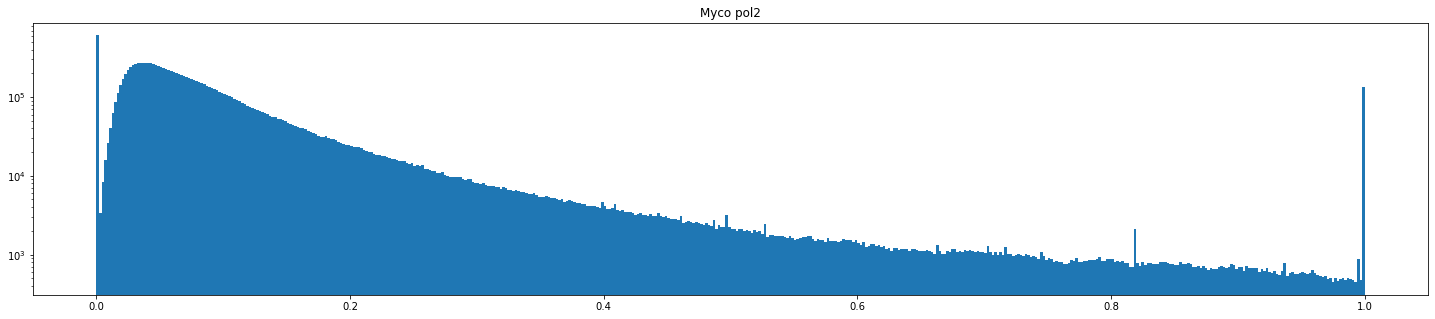

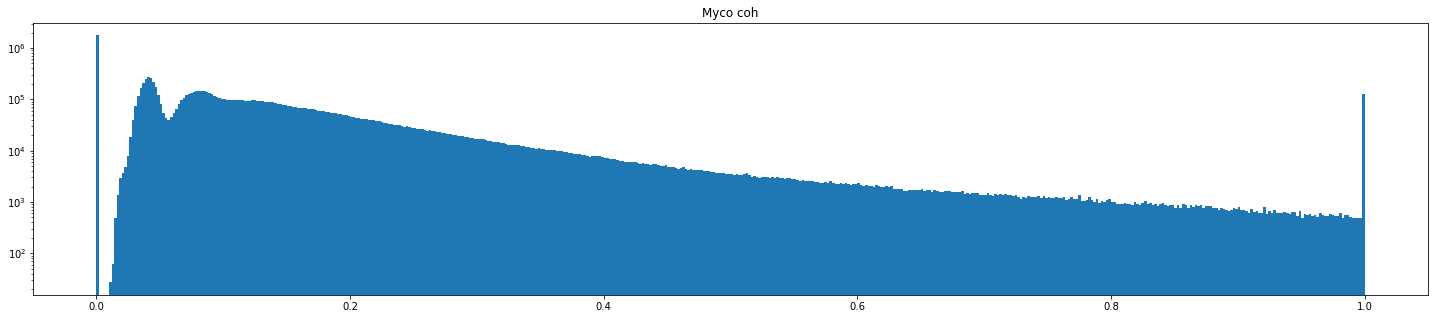

In [114]:
mergem = np.concatenate(list(myco_pol_ratio.values()))
# mergemonm = np.concatenate()
plt.figure(figsize=(25, 5))
plt.title('Myco pol2')
plt.hist(mergem, bins=500, range=(0, 1))
plt.yscale('log')
plt.show()

mergep = np.concatenate(list(pneu_pol_ratio.values()))
plt.figure(figsize=(25, 5))
plt.title('Myco coh')
plt.hist(mergep, bins=500, range=(0, 1))
plt.yscale('log')
plt.show()

In [66]:
gff_myco = pd.read_csv(Path(data_dir, species, 'genome', 'W303_Mmmyco.gff3'), sep='\t', header=0,
                       names=['seqid', 'source', 'type', 'start', 'end', 'score', 'strand', 'phase', 'attributes'])
df_centr_myco = gff_myco[gff_myco['type'] == 'centromere']
df_centr_myco.index = df_centr_myco['seqid']
df_centr_myco

,seqid,source,type,start,end,score,strand,phase,attributes
seqid,,,,,,,,,
chrI,chrI,W303,centromere,151986,152103,.,+,.,ID=CEN1;Name=CEN1
chrII,chrII,W303,centromere,238343,238459,.,+,.,ID=CEN2;Name=CEN2
chrIII,chrIII,W303,centromere,119940,120056,.,+,.,ID=CEN3;Name=CEN3
chrIV,chrIV,W303,centromere,447614,447732,.,+,.,ID=CEN4;Name=CEN4
chrV,chrV,W303,centromere,152150,152267,.,+,.,ID=CEN5;Name=CEN5
chrVI,chrVI,W303,centromere,149343,149460,.,+,.,ID=CEN6;Name=CEN6
chrVII,chrVII,W303,centromere,492269,492387,.,-,.,ID=CEN7;Name=CEN7
chrVIII,chrVIII,W303,centromere,99360,99477,.,-,.,ID=CEN8;Name=CEN8
chrIX,chrIX,W303,centromere,345256,345372,.,+,.,ID=CEN9;Name=CEN9


In [67]:
gff_pneu = pd.read_csv(Path(data_dir, species, 'genome', 'S288c_Mpneumo.gtf'), sep='\t', header=0, skiprows=4,
                       names=['seqid', 'source', 'type', 'start', 'end', 'score', 'strand', 'phase', 'attributes'])
np.unique(gff_pneu['type'])

array(['CDS', 'exon', 'five_prime_utr', 'gene', 'start_codon',
       'stop_codon', 'transcript'], dtype=object)

chrI 117 [0.13675214] 0.4918001638877384
chrII 116 [0.12068966] 0.5719250580698907
chrIII 116 [0.12931034] 0.42009877282110386
chrIV 118 [0.16949153] 0.5203114023702259
chrV 117 [0.15384615] 0.46346606680378943
chrVI 117 [0.13675214] 0.895421443746458
chrVII 118 [0.15254237] 0.6389875494129934
chrVIII 117 [0.16239316] 0.6683200147409647
chrIX 116 [0.11206897] 0.7658761852848899
chrX 118 [0.13559322] 0.9213446831627456
chrXI 117 [0.13675214] 0.7376395619261604
chrXII 119 [0.11764706] 0.6220795585492589
chrXIII 118 [0.20338983] 0.6217655300487049
chrXIV 117 [0.14529915] 0.7415795645315383
chrXV 118 [0.15254237] 0.4349439999385441
chrXVI 116 [0.12068966] 0.7686640934666671


(0.0, 1.0)

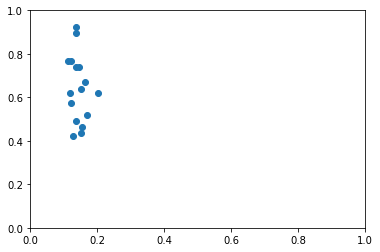

In [62]:
x, y = [], []
for chr_id, one_hot in one_hots_myco.items():
    if chr_id not in ['Mmmyco', 'Mpneumo', 'Mito']:
        start, end = df_centr_myco.loc[chr_id, ['start', 'end']]
        print(chr_id, end - start, utils.GC_content(one_hot[start:end]), myco_coh_ratio[chr_id][start:end].mean())
        x.append(utils.GC_content(one_hot[start:end])[0])
        y.append(myco_coh_ratio[chr_id][start:end].mean())
plt.scatter(x, y)
plt.xlim(0, 1)
plt.ylim(0, 1)

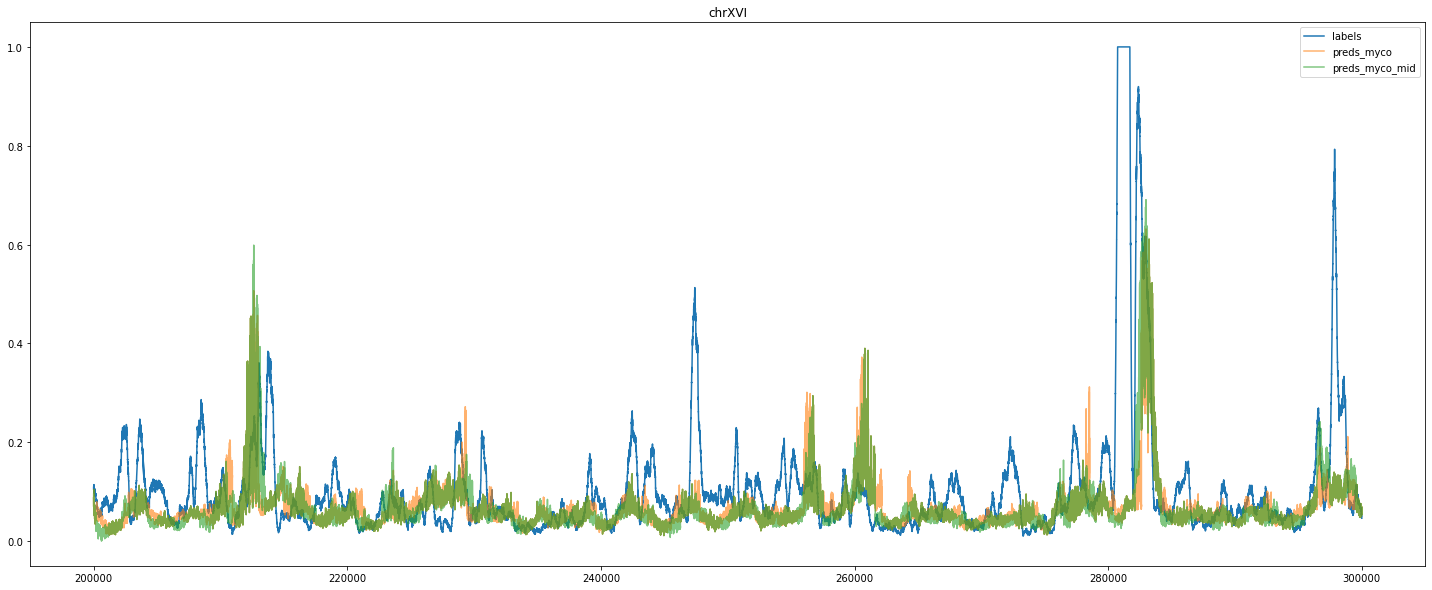

In [22]:
chr_id = 'chrXVI'
start = 200_000
stop = start + 100_000

fig, ax = plt.subplots(1, 1, sharex=True, figsize=(25, 10), facecolor='w')
stop = min(stop, lens[chr_id])
ax.set_title(chr_id)
ax.plot(np.arange(start, stop), labels_pol[chr_id][start:stop], label='labels')
ax.plot(np.arange(start, stop), preds_myco_pol17[chr_id][start:stop], label='preds_myco', alpha=0.6)
ax.plot(np.arange(start, stop), preds_myco_pol17mid[chr_id][start:stop], label='preds_myco_mid', alpha=0.6)
# ax.plot(np.arange(start, stop), preds_pneu_pol17[chr_id][start:stop], label='preds_pneu', alpha=0.6)
# ax.plot(np.arange(start, stop), preds_pneu_pol17_mid[chr_id][start:stop], label='preds_pneu_mid', alpha=0.6)
# ax.plot(np.arange(start, stop), np.repeat(preds_monm24[chr_id][::128], 128)[:len(preds_monm24[chr_id])][start:stop], label='preds_binned', alpha=0.6)

# ax3 = ax.twinx()
# ax3.plot(np.arange(start, stop), pneu_pol_ip[chr_id][start:stop], label='pol_ip', color=colors[5])
# ax3.plot(np.arange(start, stop), myco_pol_ip2[chr_id][start:stop], label='myco_pol_ip2', color=colors[2])
# ax3.plot(np.arange(start, stop), myco_pol_ctrl[chr_id][start:stop], label='myco_pol_ctrl', color=colors[6])
# ax3.plot(np.arange(start, stop), myco_pol_ctrl2[chr_id][start:stop], label='myco_pol_ctrl2', color=colors[4])
# ax3.plot(np.arange(start, stop), pneu_coh_ctrl[chr_id][start:stop], label='pneu_coh_ctrl', color=colors[3])
# ax3.set_ylim((-1, 50))
ax.legend()
# ax3.legend()

<AxesSubplot:>

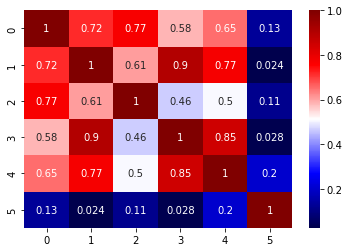

In [161]:
corrs = np.corrcoef([signals['Mmmyco'] for signals in [myco_pol_log, myco_pol_KL, pol2_myco_clip, myco_pol_ip, myco_pol_ip2, preds_m]])
sns.heatmap(corrs, cmap='seismic', annot=True)

In [7]:
def save_corrs_df(model_name, annot, preprocessing, middle):
    if annot == 'coh':
        if preprocessing == '':
            labels_myco, labels_pneu = myco_coh, pneu_coh
        elif preprocessing == '_KL':
            labels_myco, labels_pneu = myco_coh_KL, pneu_coh_KL
        elif preprocessing == '_log':
            labels_myco, labels_pneu = myco_coh_log, pneu_coh_log
        elif preprocessing == '_log_smooth10':
            labels_myco, labels_pneu = myco_coh_log_smooth10, pneu_coh_log_smooth10
        elif preprocessing == '_ratio':
            labels_myco, labels_pneu = myco_coh_ratio, pneu_coh_ratio
    elif annot == 'pol':
        if preprocessing == '':
            labels_myco, labels_pneu = myco_pol, pneu_pol
        elif preprocessing == '_KL':
            labels_myco, labels_pneu = myco_pol_KL, pneu_pol_KL
        elif preprocessing == '_log':
            labels_myco, labels_pneu = myco_pol_log, pneu_pol_log
        elif preprocessing == '_log_smooth10':
            labels_myco, labels_pneu = myco_pol_log_smooth10, pneu_pol_log_smooth10
        elif preprocessing == '_ratio':
            labels_myco, labels_pneu = myco_pol_ratio, pneu_pol_ratio
    elif annot == 'nuc':
        labels_myco, labels_pneu = myco_nuc, pneu_nuc
    df_corrs = pd.DataFrame(index=list(one_hots_myco.keys()) + ['Mpneumo'],
                            columns=['W303_Mmmyco', 'W303_Mmmyco_rev', 'S288c_Mpneumo', 'S288c_Mpneumo_rev'])
    if middle:
        midadd = '_mid'
    else:
        midadd = ''
    with np.load(Path(data_dir, 'SCerevisiae', 'results', model_name, f'preds{midadd}_on_W303_Mmmyco.npz')) as fm:
        with np.load(Path(data_dir, 'SCerevisiae', 'results', model_name, f'preds{midadd}_on_S288c_Mpneumo.npz')) as fp:
            for chr_id, labels in labels_myco.items():
                df_corrs.loc[chr_id, 'W303_Mmmyco'] = pearsonr(fm[chr_id], labels)[0]
                df_corrs.loc[chr_id, 'W303_Mmmyco_rev'] = pearsonr(fm[f'{chr_id}_rev'], labels)[0]
                if chr_id != 'Mmmyco':
                    df_corrs.loc[chr_id, 'S288c_Mpneumo'] = pearsonr(fp[chr_id[3:]], labels_pneu[chr_id[3:]])[0]
                    df_corrs.loc[chr_id, 'S288c_Mpneumo_rev'] = pearsonr(fp[f'{chr_id[3:]}_rev'], labels_pneu[chr_id[3:]])[0]
            chr_id = 'Mpneumo'
            df_corrs.loc[chr_id, 'S288c_Mpneumo'] = pearsonr(fp[chr_id], labels_pneu[chr_id])[0]
            df_corrs.loc[chr_id, 'S288c_Mpneumo_rev'] = pearsonr(fp[f'{chr_id}_rev'], labels_pneu[chr_id])[0]
    df_corrs.to_csv(Path(data_dir, 'SCerevisiae', 'results', model_name, f'chromosome_corrs{preprocessing}{midadd}'))
    return df_corrs

model_name = 'model_pneu_coh_14_rep2'
annot = 'coh' # 'nuc' # 'pol' #
middle = False
if annot == 'nuc':
    preprocess = ''
elif annot in {'coh', 'pol'}:
    preprocess = '_ratio'
else:
    raise ValueError("annot must be 'nuc', 'coh' or 'pol'")
df_corrs = save_corrs_df(model_name, annot, preprocess, middle)
# preprocessing = '_ratio' # '_log_smooth10' # '_log' # '' # '_KL' #
# for preprocess in ['_ratio']: # ['']: # ['_KL', '', '_log']: #
#     if preprocess == preprocessing:
#         df_corrs = save_corrs_df(model_name, annot, preprocess)
#     else:
#         save_corrs_df(model_name, annot, preprocess)
df_corrs

,W303_Mmmyco,W303_Mmmyco_rev,S288c_Mpneumo,S288c_Mpneumo_rev
chrI,0.641097,0.627166,0.864374,0.876916
chrII,0.824832,0.792397,0.880767,0.894304
chrIII,0.719278,0.721835,0.877898,0.85504
chrIV,0.832947,0.821486,0.872336,0.868183
chrV,0.754572,0.756871,0.890997,0.888154
chrVI,0.723549,0.674505,0.904271,0.886076
chrVII,0.78212,0.790651,0.891707,0.884829
chrVIII,0.741766,0.73408,0.836932,0.834433
chrIX,0.696731,0.698422,0.884602,0.883321
chrX,0.801033,0.791608,0.875636,0.877771


In [11]:
model_name = 'model_myco_pol_17'
with np.load(Path(data_dir, 'SCerevisiae', 'results', model_name, 'preds_on_W303_Mmmyco.npz')) as fm:
    preds_myco_pol17 = {k: fm[k] for k in fm.keys()}
with np.load(Path(data_dir, 'SCerevisiae', 'results', model_name, 'preds_on_S288c_Mpneumo.npz')) as fp:
    preds_myco_pol17.update({k: fp[k] for k in fp.keys()})
with np.load(Path(data_dir, 'SCerevisiae', 'results', model_name, 'preds_mid_on_W303_Mmmyco.npz')) as fm:
    preds_myco_pol17mid = {k: fm[k] for k in fm.keys()}
with np.load(Path(data_dir, 'SCerevisiae', 'results', model_name, 'preds_mid_on_S288c_Mpneumo.npz')) as fp:
    preds_myco_pol17mid.update({k: fp[k] for k in fp.keys()})
model_name = 'model_pneu_pol_17'
with np.load(Path(data_dir, 'SCerevisiae', 'results', model_name, 'preds_on_W303_Mmmyco.npz')) as fm:
    preds_pneu_pol17 = {k: fm[k] for k in fm.keys()}
with np.load(Path(data_dir, 'SCerevisiae', 'results', model_name, 'preds_on_S288c_Mpneumo.npz')) as fp:
    preds_pneu_pol17.update({k: fp[k] for k in fp.keys()})
with np.load(Path(data_dir, 'SCerevisiae', 'results', model_name, 'preds_mid_on_W303_Mmmyco.npz')) as fm:
    preds_pneu_pol17mid = {k: fm[k] for k in fm.keys()}
with np.load(Path(data_dir, 'SCerevisiae', 'results', model_name, 'preds_mid_on_S288c_Mpneumo.npz')) as fp:
    preds_pneu_pol17mid.update({k: fp[k] for k in fp.keys()})
model_name = 'model_myco_coh_14'
with np.load(Path(data_dir, 'SCerevisiae', 'results', model_name, 'preds_on_W303_Mmmyco.npz')) as fm:
    preds_myco_coh14 = {k: fm[k] for k in fm.keys()}
with np.load(Path(data_dir, 'SCerevisiae', 'results', model_name, 'preds_on_S288c_Mpneumo.npz')) as fp:
    preds_myco_coh14.update({k: fp[k] for k in fp.keys()})
with np.load(Path(data_dir, 'SCerevisiae', 'results', model_name, 'preds_mid_on_W303_Mmmyco.npz')) as fm:
    preds_myco_coh14mid = {k: fm[k] for k in fm.keys()}
with np.load(Path(data_dir, 'SCerevisiae', 'results', model_name, 'preds_mid_on_S288c_Mpneumo.npz')) as fp:
    preds_myco_coh14mid.update({k: fp[k] for k in fp.keys()})
model_name = 'model_pneu_coh_14'
with np.load(Path(data_dir, 'SCerevisiae', 'results', model_name, 'preds_on_W303_Mmmyco.npz')) as fm:
    preds_pneu_coh14 = {k: fm[k] for k in fm.keys()}
with np.load(Path(data_dir, 'SCerevisiae', 'results', model_name, 'preds_on_S288c_Mpneumo.npz')) as fp:
    preds_pneu_coh14.update({k: fp[k] for k in fp.keys()})
with np.load(Path(data_dir, 'SCerevisiae', 'results', model_name, 'preds_mid_on_W303_Mmmyco.npz')) as fm:
    preds_pneu_coh14mid = {k: fm[k] for k in fm.keys()}
with np.load(Path(data_dir, 'SCerevisiae', 'results', model_name, 'preds_mid_on_S288c_Mpneumo.npz')) as fp:
    preds_pneu_coh14mid.update({k: fp[k] for k in fp.keys()})

In [142]:
for model_name in ['model_myco_pol_17', 'model_pneu_pol_17']:
    with np.load(Path(data_dir, 'SCerevisiae', 'results', model_name, 'preds_mid_on_W303_Mmmyco.npz')) as fm:
        preds_myco = {k: fm[k] for k in fm.keys()}
    with np.load(Path(data_dir, 'SCerevisiae', 'results', model_name, 'preds_mid_on_S288c_Mpneumo.npz')) as fp:
        preds_pneu = {k: fp[k] for k in fp.keys()}
    utils.write_bw(Path(data_dir, 'SCerevisiae', 'results', model_name, f'preds_mid_{model_name}_on_W303_Mmmyco.bw'), preds_myco)
    utils.write_bw(Path(data_dir, 'SCerevisiae', 'results', model_name, f'preds_mid_{model_name}_on_S288c_Mpneumo.bw'), preds_pneu)

,W303_Mmmyco,W303_Mmmyco_rev,S288c_Mpneumo,S288c_Mpneumo_rev
chrI,0.449050,0.449142,0.653600,0.655790
chrII,0.506007,0.505324,0.718132,0.719074
chrIII,0.475997,0.474129,0.732754,0.732164
chrIV,0.464192,0.464903,0.685400,0.687610
chrV,0.491082,0.489203,0.715117,0.713874
chrVI,0.460859,0.465063,0.681082,0.683498
chrVII,0.484060,0.483210,0.711544,0.710500
chrVIII,0.536789,0.538873,0.697672,0.700733
chrIX,0.504517,0.506402,0.701997,0.702621
chrX,0.498397,0.497596,0.698984,0.697740


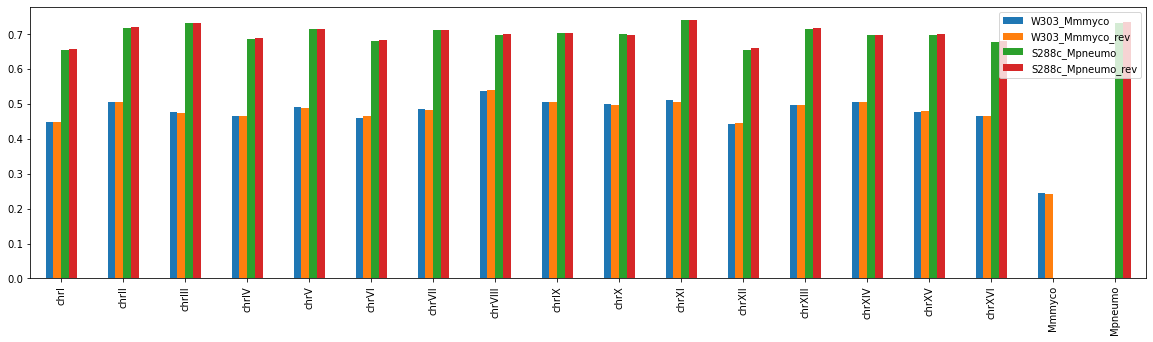

In [82]:
model_name = 'model_pneu_nuc_1'
df = pd.read_csv(Path(data_dir, 'SCerevisiae', 'results', model_name, f'chromosome_corrs'), index_col=0)
df.plot(kind='bar', figsize=(20, 5))
df

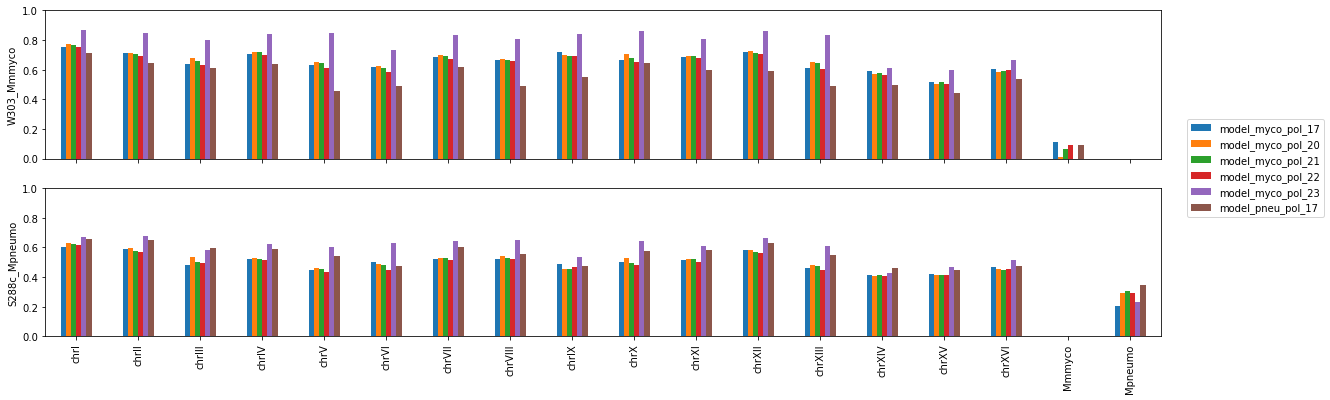

In [16]:
model_names = ['model_myco_pol_17', 'model_myco_pol_20', 'model_myco_pol_21', 'model_myco_pol_22', 'model_myco_pol_23', 'model_pneu_pol_17']
full_myco = pd.DataFrame(columns=model_names)
full_pneu = pd.DataFrame(columns=model_names)

for model_name in model_names:
    try:
        df = pd.read_csv(Path(data_dir, 'SCerevisiae', 'results', model_name, f'chromosome_corrs_ratio'), index_col=0)
    except FileNotFoundError:
        df = pd.read_csv(Path(data_dir, 'SCerevisiae', 'results', model_name, f'chromosome_corrs_log'), index_col=0)
    full_myco[model_name] = df['W303_Mmmyco']
    full_pneu[model_name] = df['S288c_Mpneumo']

fig, axes = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(20, 6))
full_myco.plot(kind='bar', ax=axes[0], ylabel='W303_Mmmyco', legend=False)
full_pneu.plot(kind='bar', ax=axes[1], ylabel='S288c_Mpneumo', legend=False)
axes[0].set_ylim((0, 1))
plt.legend(bbox_to_anchor=(1.15, 1.5))

Compute GC content

In [6]:
gc_W303 = utils.GC_content(np.expand_dims(np.concatenate([v for k, v in one_hots_myco.items() if k!='Mmmyco']), axis=0))
gc_S288c = utils.GC_content(np.expand_dims(np.concatenate([v for k, v in one_hots_pneu.items() if k!='Mpneumo']), axis=0))
gc_myco = utils.GC_content(np.expand_dims(one_hots_myco['Mmmyco'], axis=0))
gc_pneu = utils.GC_content(np.expand_dims(one_hots_pneu['Mpneumo'], axis=0))    
print(gc_W303, gc_S288c, gc_myco, gc_pneu)

[0.38334965] [0.38297367] [0.24156089] [0.40010954]


Nucleosome distance

(-1.0, 400.0)

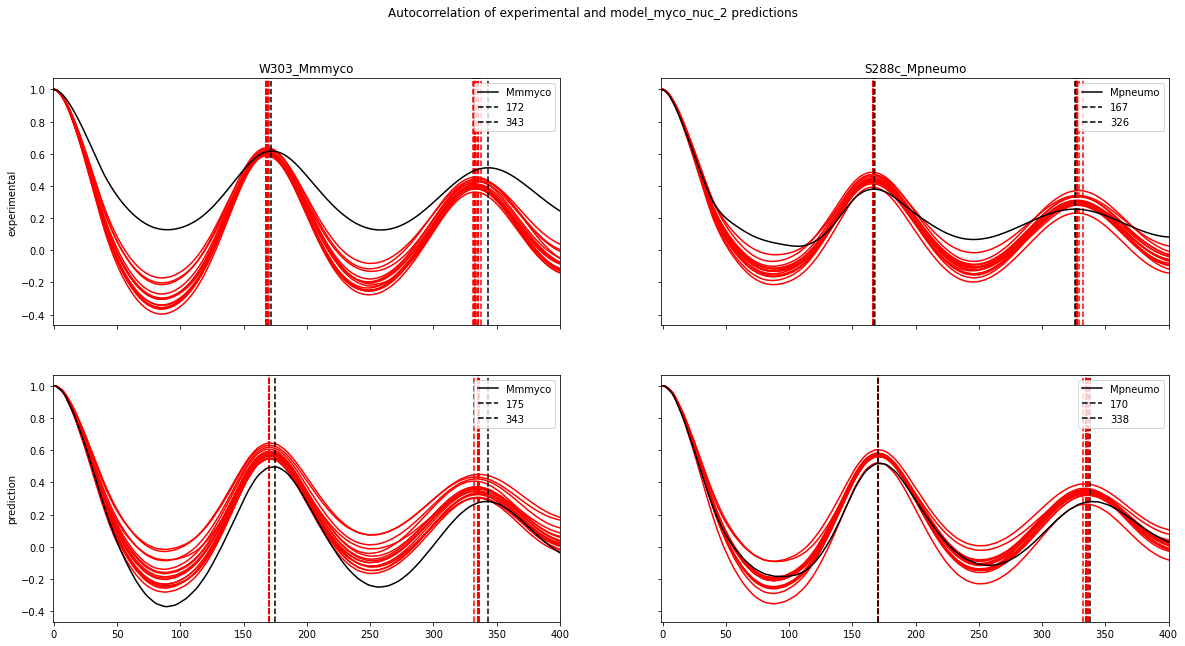

In [14]:
model_name = 'model_myco_nuc_2'
with np.load(Path(data_dir, 'SCerevisiae', 'results', model_name, 'preds_on_W303_Mmmyco.npz')) as fm:
    preds_m = {k: fm[k] for k in fm.keys() if k[-4:] != '_rev'}
with np.load(Path(data_dir, 'SCerevisiae', 'results', model_name, 'preds_on_S288c_Mpneumo.npz')) as fp:
    preds_p = {k: fp[k] for k in fp.keys() if k[-4:] != '_rev' and k != 'Mito'}

fig, axes = plt.subplots(2, 2, sharey=True, sharex=True, figsize=(20, 10), facecolor='w')
fig.suptitle(f'Autocorrelation of experimental and {model_name} predictions')

for chr_id, signal in myco_nuc.items():
    centered_signal = signal - np.mean(signal)
    corrs = scipy.signal.correlate(centered_signal, centered_signal, mode='full')
    lags = scipy.signal.correlation_lags(signal.size, signal.size, mode="full")
    corrs /= corrs[lags == 0]
    if chr_id[0] == 'M':
        axes[0, 0].plot(lags, corrs, label=chr_id, color='k')
        best_autocorr = 100 + np.argmax(corrs[(lags >= 100) & (lags < 250)])
        axes[0, 0].axvline(best_autocorr, color='k', linestyle='--', label=str(best_autocorr))
        autocorr2 = 250 + np.argmax(corrs[(lags >= 250) & (lags < 450)])
        axes[0, 0].axvline(autocorr2, color='k', linestyle='--', label=str(autocorr2))
    else:
        axes[0, 0].plot(lags, corrs, color='r')
        best_autocorr = 100 + np.argmax(corrs[(lags >= 100) & (lags < 250)])
        axes[0, 0].axvline(best_autocorr, color='r', linestyle='--')
        autocorr2 = 250 + np.argmax(corrs[(lags >= 250) & (lags < 450)])
        axes[0, 0].axvline(autocorr2, color='r', linestyle='--')
axes[0, 0].legend(loc='upper right')

for chr_id, signal in pneu_nuc.items():
    centered_signal = signal - np.mean(signal)
    corrs = scipy.signal.correlate(centered_signal, centered_signal, mode='full')
    lags = scipy.signal.correlation_lags(signal.size, signal.size, mode="full")
    corrs /= corrs[lags == 0]
    if chr_id[0] == 'M':
        axes[0, 1].plot(lags, corrs, label=chr_id, color='k')
        best_autocorr = 100 + np.argmax(corrs[(lags >= 100) & (lags < 250)])
        axes[0, 1].axvline(best_autocorr, color='k', linestyle='--', label=str(best_autocorr))
        autocorr2 = 250 + np.argmax(corrs[(lags >= 250) & (lags < 450)])
        axes[0, 1].axvline(autocorr2, color='k', linestyle='--', label=str(autocorr2))
    else:
        axes[0, 1].plot(lags, corrs, color='r')
        best_autocorr = 100 + np.argmax(corrs[(lags >= 100) & (lags < 250)])
        axes[0, 1].axvline(best_autocorr, color='r', linestyle='--')
        autocorr2 = 250 + np.argmax(corrs[(lags >= 250) & (lags < 450)])
        axes[0, 1].axvline(autocorr2, color='r', linestyle='--')
axes[0, 1].legend(loc='upper right')

for chr_id, signal in preds_m.items():
    centered_signal = signal - np.mean(signal)
    corrs = scipy.signal.correlate(centered_signal, centered_signal, mode='full')
    corrs = utils.smooth(corrs, 4)
    lags = scipy.signal.correlation_lags(signal.size, signal.size, mode="full")
    corrs /= corrs[lags == 0]
    if chr_id[0] == 'M':
        axes[1, 0].plot(lags, corrs, label=chr_id, color='k')
        best_autocorr = 100 + np.argmax(corrs[(lags >= 100) & (lags < 250)])
        axes[1, 0].axvline(best_autocorr, color='k', linestyle='--', label=str(best_autocorr))
        autocorr2 = 250 + np.argmax(corrs[(lags >= 250) & (lags < 450)])
        axes[1, 0].axvline(autocorr2, color='k', linestyle='--', label=str(autocorr2))
    else:
        axes[1, 0].plot(lags, corrs, color='r')
        best_autocorr = 100 + np.argmax(corrs[(lags >= 100) & (lags < 250)])
        axes[1, 0].axvline(best_autocorr, color='r', linestyle='--')
        autocorr2 = 250 + np.argmax(corrs[(lags >= 250) & (lags < 450)])
        axes[1, 0].axvline(autocorr2, color='r', linestyle='--')
axes[1, 0].legend(loc='upper right')

for chr_id, signal in preds_p.items():
    centered_signal = signal - np.mean(signal)
    corrs = scipy.signal.correlate(centered_signal, centered_signal, mode='full')
    corrs = utils.smooth(corrs, 4)
    lags = scipy.signal.correlation_lags(signal.size, signal.size, mode="full")
    corrs /= corrs[lags == 0]
    if chr_id[0] == 'M':
        axes[1, 1].plot(lags, corrs, label=chr_id, color='k')
        best_autocorr = 100 + np.argmax(corrs[(lags >= 100) & (lags < 250)])
        axes[1, 1].axvline(best_autocorr, color='k', linestyle='--', label=str(best_autocorr))
        autocorr2 = 250 + np.argmax(corrs[(lags >= 250) & (lags < 450)])
        axes[1, 1].axvline(autocorr2, color='k', linestyle='--', label=str(autocorr2))
    else:
        axes[1, 1].plot(lags, corrs, color='r')
        best_autocorr = 100 + np.argmax(corrs[(lags >= 100) & (lags < 250)])
        axes[1, 1].axvline(best_autocorr, color='r', linestyle='--')
        autocorr2 = 250 + np.argmax(corrs[(lags >= 250) & (lags < 450)])
        axes[1, 1].axvline(autocorr2, color='r', linestyle='--')
axes[1, 1].legend(loc='upper right')

axes[0, 0].set_title('W303_Mmmyco')
axes[0, 1].set_title('S288c_Mpneumo')
axes[0, 0].set_ylabel('experimental')
axes[1, 0].set_ylabel('prediction')
axes[0, 0].set_xlim((-1, 400))
# axes[0, 0].set_xlim((130, 230))
# axes[0, 0].set_ylim((0, 0.8))

# outfile = utils.safe_filename(Path(data_dir, species, 'results', model_name, f'Autocorr_experimental_and_{model_name}_predictions.png'))
# plt.savefig(outfile, bbox_inches='tight')

Predictions on random sequences

In [6]:
preds_nuc_rand_etienne = np.load(Path(data_dir, species, 'results', 'models_etienne', 'random_seqs', 'preds_all_reps_myco_nucleosome_random_strictGCrange_indep_10000.npy'))
preds_coh_rand_etienne = np.load(Path(data_dir, species, 'results', 'models_etienne', 'random_seqs', 'preds_all_reps_myco_cohesine_random_strictGCrange_indep_32.npy'))
preds_pol_rand_etienne = np.load(Path(data_dir, species, 'results', 'models_etienne', 'random_seqs', 'preds_all_reps_myco_pol_random_strictGCrange_indep_32.npy'))


In [6]:
preds_nuc_rand = np.load(Path(data_dir, species, 'results', 'random_seqs', f'preds_myco_pneu_v1_nucleosome_random_strictGCrange_indep_10000.npy'))
preds_coh_rand = np.load(Path(data_dir, species, 'results', 'random_seqs', f'preds_myco_pneu_14_cohesine_random_strictGCrange_indep_32.npy'))
preds_pol_rand = np.load(Path(data_dir, species, 'results', 'random_seqs', f'preds_myco_pneu_17_pol_random_strictGCrange_indep_32.npy'))
n_gcs = len(preds_nuc_rand)
gcs = np.linspace(0, 1, n_gcs)

In [7]:
preds_nuc2_rand = np.load(Path(data_dir, species, 'results', 'random_seqs', f'preds_myco_pneu_2_rep2_nucleosome_random_strictGCrange_indep_10000.npy'))
preds_coh2_rand = np.load(Path(data_dir, species, 'results', 'random_seqs', f'preds_myco_pneu_14_rep2_cohesine_random_strictGCrange_indep_32.npy'))
preds_pol2_rand = np.load(Path(data_dir, species, 'results', 'random_seqs', f'preds_myco_pneu_17_rep2_pol_random_strictGCrange_indep_32.npy'))
preds_nuc3_rand = np.load(Path(data_dir, species, 'results', 'random_seqs', f'preds_myco_pneu_2_rep3_nucleosome_random_strictGCrange_indep_10000.npy'))
preds_coh3_rand = np.load(Path(data_dir, species, 'results', 'random_seqs', f'preds_myco_pneu_14_rep3_cohesine_random_strictGCrange_indep_32.npy'))
preds_pol3_rand = np.load(Path(data_dir, species, 'results', 'random_seqs', f'preds_myco_pneu_17_rep3_pol_random_strictGCrange_indep_32.npy'))


In [8]:
preds_nuc_rand_reps = np.hstack([preds_nuc_rand, preds_nuc2_rand, preds_nuc3_rand])
preds_coh_rand_reps = np.hstack([preds_coh_rand, preds_coh2_rand, preds_coh3_rand])
preds_pol_rand_reps = np.hstack([preds_pol_rand, preds_pol2_rand, preds_pol3_rand])

In [48]:
preds_rand_myco_coh = preds_coh_rand.reshape(21, 2, -1, 256)[:, 0, :, :]
preds_rand_pneu_coh = preds_coh_rand.reshape(21, 2, -1, 256)[:, 1, :, :]
preds_rand_myco_pol = preds_pol_rand.reshape(21, 2, -1, 16)[:, 0, :, :]
preds_rand_pneu_pol = preds_pol_rand.reshape(21, 2, -1, 16)[:, 1, :, :]

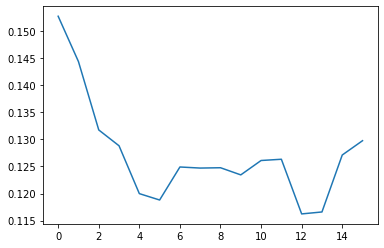

In [134]:
temp = preds_rand_pneu_pol.mean(axis=(0, 1))
plt.plot(temp)

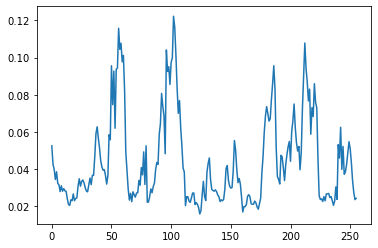

In [117]:
temp = preds_pneu_pol17['chrII'][:32768*24].reshape(-1, 256, 128).std(axis=(0, 2))
plt.plot(temp)

In [61]:
preds_coh_rand_myco = np.load(Path(data_dir, species, 'results', 'random_seqs', 'preds_myco_pneu_14_cohesine_trueMmmyco_37.npy'))
gcs_myco = np.load(Path(data_dir, species, 'results', 'random_seqs', 'gcs_myco_pneu_cohesine_trueMmmyco_37.npy'))

In [13]:
preds_nuc_rand4 = np.load(Path(data_dir, species, 'results', 'random_seqs', f'preds_myco_pneu_4_nucleosome_random_strictGCrange_indep_10000.npy'))
preds_coh_rand25 = np.load(Path(data_dir, species, 'results', 'random_seqs', f'preds_myco_pneu_25_cohesine_random_strictGCrange_indep_32.npy'))
preds_pol_rand25 = np.load(Path(data_dir, species, 'results', 'random_seqs', f'preds_myco_pneu_25_pol_random_strictGCrange_indep_32.npy'))

In [35]:
preds_coh_rand = np.hstack([preds_coh_rand14, preds_coh_rand15, preds_coh_rand16])
preds_pol_rand = np.hstack([preds_pol_rand14, preds_pol_rand15, preds_pol_rand16])

(-0.05, 1.0)

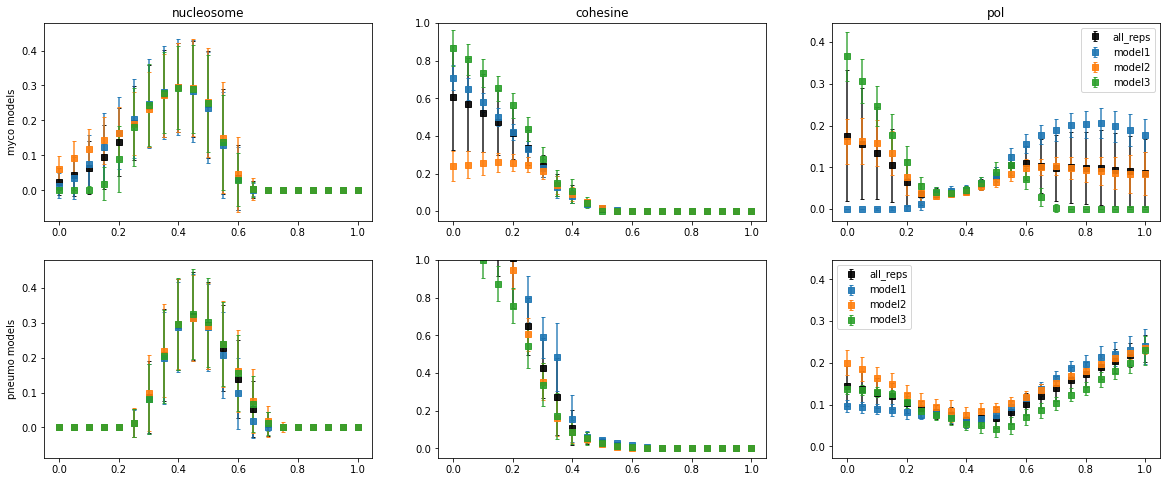

In [36]:
q_min, q_max = 0.1, 0.9
nrow = 2
ncol = 3
fmts = ['bs', 'rs', 'gs']
annots = ['nucleosome', 'cohesine', 'pol']
ylabels = ['myco models', 'pneumo models']
fig, axes = plt.subplots(nrow, ncol, sharey='col', figsize=(20, 8), facecolor='w')
for col in range(ncol):
    axes[0, col].set_title(annots[col])
for row in range(nrow):
    if row == 0:
        preds_nuc, preds_coh, preds_pol = preds_nuc_rand_reps, preds_coh_rand_reps, preds_pol_rand_reps
        n_reps = [3, 3, 3]
    elif row == 1:
        preds_nuc, preds_coh, preds_pol = preds_nuc_rand_reps, preds_coh_rand_reps, preds_pol_rand_reps
        n_reps = [3, 3, 3]
    # elif row == 1:
    #     preds_nuc, preds_coh, preds_pol = preds_nuc_rand_etienne, preds_coh_rand_etienne, preds_pol_rand_etienne
    #     n_reps = [3, 3, 3]
    for col, (preds, n_rep) in enumerate(zip([preds_nuc, preds_coh, preds_pol], n_reps)):
        if row == 0:
            preds = preds.reshape(21, 6, -1)[:, ::2, :].reshape(21, -1)
        elif row == 1:
            preds = preds.reshape(21, 6, -1)[:, 1::2, :].reshape(21, -1)
        axes[row, col].errorbar(gcs, y=preds.mean(axis=1), yerr=preds.std(axis=1), fmt='ks', alpha=0.9, label='all_reps', capsize=2)
        means = preds.reshape(n_gcs, n_rep, -1).mean(axis=2)
        stds = preds.reshape(n_gcs, n_rep, -1).std(axis=2)
        for i in range(n_rep):
            axes[row, col].errorbar(gcs, y=means[:, i], yerr=stds[:, i], fmt='s', alpha=0.9, label=f'model{i+1}', capsize=2)
    axes[row, 0].set_ylabel(ylabels[row])
    axes[row, col].legend()
axes[0, 1].set_ylim((-0.05, 1))

Load predictions

In [9]:
with np.load(Path(data_dir, 'SCerevisiae', 'data', 'labels_myco_nuc.npz')) as f:
    labels_nuc = {k: f[k] for k in f.keys() if k != 'Mito'}
with np.load(Path(data_dir, 'SCerevisiae', 'data', 'labels_pneu_nuc.npz')) as f:
    labels_nuc.update({k: f[k] for k in f.keys() if k != 'Mito'})

with np.load(Path(data_dir, 'SCerevisiae', 'data', 'GSE217022', 'labels_myco_coh_ratio.npz')) as f:
    labels_coh = {k: f[k] for k in f.keys() if k != 'Mito'}
with np.load(Path(data_dir, 'SCerevisiae', 'data', 'GSE217022', 'labels_pneu_coh_ratio.npz')) as f:
    labels_coh.update({k: f[k] for k in f.keys() if k != 'Mito'})

with np.load(Path(data_dir, 'SCerevisiae', 'data', 'GSE217022', 'labels_myco_pol_ratio.npz')) as f:
    labels_pol = {k: f[k] for k in f.keys() if k != 'Mito'}
with np.load(Path(data_dir, 'SCerevisiae', 'data', 'GSE217022', 'labels_pneu_pol_ratio.npz')) as f:
    labels_pol.update({k: f[k] for k in f.keys() if k != 'Mito'})

with np.load(Path(data_dir, 'SCerevisiae', 'results', 'model_myco_nuc_2', 'preds_on_W303_Mmmyco.npz')) as f:
    preds_nuc_myco = {k: f[k] for k in f.keys() if k[-4:] != '_rev' and k != 'Mito'}
with np.load(Path(data_dir, 'SCerevisiae', 'results', 'model_myco_nuc_2', 'preds_on_S288c_Mpneumo.npz')) as f:
    preds_nuc_myco.update({k: f[k] for k in f.keys() if k[-4:] != '_rev' and k != 'Mito'})

with np.load(Path(data_dir, 'SCerevisiae', 'results', 'model_pneu_nuc_2', 'preds_on_W303_Mmmyco.npz')) as f:
    preds_nuc_pneu = {k: f[k] for k in f.keys() if k[-4:] != '_rev' and k != 'Mito'}
with np.load(Path(data_dir, 'SCerevisiae', 'results', 'model_pneu_nuc_2', 'preds_on_S288c_Mpneumo.npz')) as f:
    preds_nuc_pneu.update({k: f[k] for k in f.keys() if k[-4:] != '_rev' and k != 'Mito'})

with np.load(Path(data_dir, 'SCerevisiae', 'results', 'model_myco_coh_14', 'preds_on_W303_Mmmyco.npz')) as f:
    preds_coh_myco = {k: f[k] for k in f.keys() if k[-4:] != '_rev' and k != 'Mito'}
with np.load(Path(data_dir, 'SCerevisiae', 'results', 'model_myco_coh_14', 'preds_on_S288c_Mpneumo.npz')) as f:
    preds_coh_myco.update({k: f[k] for k in f.keys() if k[-4:] != '_rev' and k != 'Mito'})

with np.load(Path(data_dir, 'SCerevisiae', 'results', 'model_pneu_coh_14', 'preds_on_W303_Mmmyco.npz')) as f:
    preds_coh_pneu = {k: f[k] for k in f.keys() if k[-4:] != '_rev' and k != 'Mito'}
with np.load(Path(data_dir, 'SCerevisiae', 'results', 'model_pneu_coh_14', 'preds_on_S288c_Mpneumo.npz')) as f:
    preds_coh_pneu.update({k: f[k] for k in f.keys() if k[-4:] != '_rev' and k != 'Mito'})

with np.load(Path(data_dir, 'SCerevisiae', 'results', 'model_myco_pol_17', 'preds_mid_on_W303_Mmmyco.npz')) as f:
    preds_pol_myco = {k: f[k] for k in f.keys() if k[-4:] != '_rev' and k != 'Mito'}
with np.load(Path(data_dir, 'SCerevisiae', 'results', 'model_myco_pol_17', 'preds_mid_on_S288c_Mpneumo.npz')) as f:
    preds_pol_myco.update({k: f[k] for k in f.keys() if k[-4:] != '_rev' and k != 'Mito'})

with np.load(Path(data_dir, 'SCerevisiae', 'results', 'model_pneu_pol_17', 'preds_mid_on_W303_Mmmyco.npz')) as f:
    preds_pol_pneu = {k: f[k] for k in f.keys() if k[-4:] != '_rev' and k != 'Mito'}
with np.load(Path(data_dir, 'SCerevisiae', 'results', 'model_pneu_pol_17', 'preds_mid_on_S288c_Mpneumo.npz')) as f:
    preds_pol_pneu.update({k: f[k] for k in f.keys() if k[-4:] != '_rev' and k != 'Mito'})

In [10]:
one_hots_yeast = {k: v for k, v in one_hots_myco.items() if k!='Mmmyco'}
one_hots_yeast.update({k: v for k, v in one_hots_pneu.items() if k!='Mpneumo'})
one_hot_myco = one_hots_myco['Mmmyco']
one_hot_pneu = one_hots_pneu['Mpneumo']

In [11]:
def window_summary(one_hot, signals, binsize, on, ks=[2, 1], includeN=True):
    if on == 'yeast':
        window_one_hot, window_signals = {}, {}
        for key, oh in one_hot.items():
            if True: # key[:3] == 'chr': #
                window_one_hot[key] = utils.chunk_regions(oh, binsize)
                window_signals[key] = utils.chunk_regions(np.vstack([signal[key] for signal in signals.values()]).T, binsize).mean(axis=1)
        window_one_hot = np.concatenate(list(window_one_hot.values()), axis=0)
        window_signals = np.concatenate(list(window_signals.values()), axis=0)
    else:
        window_one_hot = utils.chunk_regions(one_hot, binsize)
        window_signals = utils.chunk_regions(np.vstack([signal[on] for signal in signals.values()]).T, binsize).mean(axis=1)
    if not includeN:
        noN_mask = np.sum(window_one_hot, axis=(1, 2)) == binsize
        window_one_hot = window_one_hot[noN_mask]
        window_signals = window_signals[noN_mask]
    window_df = pd.concat([pd.DataFrame(utils.GC_content(window_one_hot), columns=['gc']),
                           pd.DataFrame(window_signals, columns=signals.keys())],
                          axis=1)
    window_kmers = {}
    for k in ks:
        window_kmers[k] = utils.kmer_counts_by_seq(window_one_hot, k, includeN=includeN)
    return window_df, window_one_hot, window_kmers

def sliding_summary(one_hot, signals, winsize, on, ks=[2, 1], includeN=True):
    if on == 'yeast':
        sliding_signals, sliding_gc, sliding_noN_mask = {}, {}, {}
        sliding_kmers = {k:{} for k in ks}
        for key, oh in one_hot.items():
            if key[:3] == 'chr': # True: #
                sliding_signals[key] = np.vstack([signal[key] for signal in signals.values()]).T[(winsize - 1) // 2:-(winsize // 2)]
                sliding_gc[key] = utils.sliding_GC(oh, winsize)
                sliding_gc[key][~np.isfinite(sliding_gc[key])] = 0.38
                sliding_noN_mask[key] = utils.moving_sum(oh, winsize, axis=0).sum(axis=1) == winsize
                for k in ks:
                    sliding_kmers[k][key] = utils.sliding_kmer_counts(oh, k, winsize, includeN=includeN)
        sliding_signals = np.concatenate(list(sliding_signals.values()), axis=0)
        sliding_gc = np.concatenate(list(sliding_gc.values()), axis=0)
        sliding_noN_mask = np.concatenate(list(sliding_noN_mask.values()), axis=0)
        for k in ks:
            sliding_kmers[k] = pd.concat(list(sliding_kmers[k].values()), axis=1)
    else:
        sliding_signals = np.vstack([signal[on] for signal in signals.values()]).T[(winsize - 1) // 2:-(winsize // 2)]
        sliding_gc = utils.sliding_GC(one_hot, winsize)
        sliding_noN_mask = utils.moving_sum(one_hot, winsize, axis=0).sum(axis=1) == winsize
        sliding_kmers = {}
        for k in ks:
            sliding_kmers[k] = utils.sliding_kmer_counts(one_hot, k, winsize, includeN=includeN)
    if not includeN:
        sliding_signals = sliding_signals[sliding_noN_mask]
        sliding_gc = sliding_gc[sliding_noN_mask]
        for k in ks:
            sliding_kmers[k] = sliding_kmers[k].loc[:, sliding_noN_mask]
    sliding_df = pd.concat([pd.DataFrame(sliding_gc, columns=['gc']),
                            pd.DataFrame(sliding_signals, columns=signals.keys())],
                           axis=1)
    return sliding_df, sliding_kmers

def linear_models(window_df, window_kmers, label_names, gc=True, ref_models=None):
    results = {}
    models = {}
    data = {f'{k}mer_{label}': (kmers.T.to_numpy() / (101 - k), window_df[label])
            for k, kmers in window_kmers.items() for label in label_names}
    if gc:
        for label in label_names:
            data[f'gc_{label}'] = (sm.tools.add_constant(window_df['gc'].to_numpy()), window_df[label])
            data[f'gc_quad_{label}'] = (sm.tools.add_constant(np.vstack([window_df['gc'].to_numpy(), window_df['gc'].to_numpy()**2]).T), window_df[label])
    for name, (X, Y) in data.items():
        mod = sm.OLS(Y, X)
        model = mod.fit()
        model_name = f'lm_{name}'
        models[model_name] = model
        results[model_name] = model.predict(X)
        if ref_models is not None:
            for ref_name in ref_models.keys():
                results[f'{model_name}_mod_{ref_name}'] = ref_models[ref_name][model_name].predict(X)
    return pd.concat([window_df, pd.DataFrame(results)], axis=1), models

def kmer_analysis_wrapper(one_hot, signals, binsizes, on, winsizes=[2001], ks=[2, 1], includeN=True, gc=True, ref_models=None):
    print(on)
    results = {}
    for winsize in winsizes:
        print(winsize)
        if ref_models is None:
            ref_models_winsize = None
        else:
            ref_models_winsize = ref_models[winsize]
        sliding_df, sliding_kmers = sliding_summary(one_hot, signals, winsize, on, ks, includeN)
        # window_kmers = {k: window_kmer for k, window_kmer in zip(ks, window_kmers)}
        label_names = ['lab_nuc', 'lab_coh', 'lab_pol']
        sliding_df, models = linear_models(sliding_df, sliding_kmers, label_names, gc, ref_models_winsize)
        sliding_df_smooth = {}
        for binsize in binsizes:
            print(binsize)
            sliding_df_smooth[binsize] = sliding_df.copy()
            for column in sliding_df.columns[1:]:
                sliding_df_smooth[binsize][column] = utils.smooth(sliding_df[column], binsize)
        results[winsize] = (sliding_df, sliding_df_smooth, sliding_kmers, models)
    if len(results) == 1:
        return results[winsize]
    else:
        return results

def seperate_low_high(window_gc, window_values, div=2):
    # Sort values by pred value
    sort_idx = np.argsort(window_values)
    sorted_gc = window_gc[sort_idx]
    # Create mask of values to take as low or high
    low_mask = np.zeros(len(sorted_gc), dtype=bool)
    high_mask = np.zeros(len(sorted_gc), dtype=bool)
    for gc, count in zip(*np.unique(window_gc, return_counts=True)):
        if count < div:
            continue
        gc_idxes = (sorted_gc == gc).nonzero()[0]
        low_mask[gc_idxes[:count // div]] = 1
        high_mask[gc_idxes[-(count // div):]] = 1
    # Reverse sort the mask
    revsort_idx = sort_idx.argsort()
    return low_mask[revsort_idx], high_mask[revsort_idx]

def seperate_3(window_gc, window_values):
    # Sort values by pred value
    sort_idx = np.argsort(window_values)
    sorted_gc = window_gc[sort_idx]
    # Create mask of values to take as low or high
    low_mask = np.zeros(len(sorted_gc), dtype=bool)
    mid_mask = np.zeros(len(sorted_gc), dtype=bool)
    high_mask = np.zeros(len(sorted_gc), dtype=bool)
    for gc, count in zip(*np.unique(window_gc, return_counts=True)):
        if count < 3:
            continue
        gc_idxes = (sorted_gc == gc).nonzero()[0]
        low_mask[gc_idxes[:count // 3]] = 1
        mid_mask[gc_idxes[count // 3 : -(count // 3)]] = 1
        high_mask[gc_idxes[-(count // 3):]] = 1
    # Reverse sort the mask
    revsort_idx = sort_idx.argsort()
    return low_mask[revsort_idx], mid_mask[revsort_idx], high_mask[revsort_idx]

In [44]:
del results_yeast, sliding_yeast, sliding_yeast_smooth, sliding_kmers_yeast, models_yeast
del results_myco, sliding_myco, sliding_myco_smooth, sliding_kmers_myco, models_myco
del results_pneu, sliding_pneu, sliding_pneu_smooth, sliding_kmers_pneu, models_pneu

In [ ]:
winsizes = [2001]
binsizes = [10, 100, 1000, 2001]
ks = [2, 1] # [] #
signals = {
    'lab_nuc': labels_nuc,
    'lab_coh': labels_coh,
    'lab_pol': labels_pol,
    'pred_nuc_myco': preds_nuc_myco,
    'pred_coh_myco': preds_coh_myco,
    'pred_pol_myco': preds_pol_myco,
    'pred_nuc_pneu': preds_nuc_pneu,
    'pred_coh_pneu': preds_coh_pneu,
    'pred_pol_pneu': preds_pol_pneu,
}
results_yeast = kmer_analysis_wrapper(one_hots_yeast, signals, binsizes, 'yeast', ks=ks, winsizes=winsizes)
models_yeast = {winsizes[0]: {'yeast': results_yeast[3]}}
results_myco = kmer_analysis_wrapper(one_hot_myco, signals, binsizes, 'Mmmyco', ks=ks, winsizes=winsizes, ref_models=models_yeast)
results_pneu = kmer_analysis_wrapper(one_hot_pneu, signals, binsizes, 'Mpneumo', ks=ks, winsizes=winsizes, ref_models=models_yeast)
sliding_yeast, sliding_yeast_smooth, sliding_kmers_yeast, models_yeast = results_yeast
sliding_myco, sliding_myco_smooth, sliding_kmers_myco, models_myco = results_myco
sliding_pneu, sliding_pneu_smooth, sliding_kmers_pneu, models_pneu = results_pneu
sliding_yeast

In [11]:
div = 3
seps = np.array(['discarded', 'low', 'high', 'mid'])
yeast_seps = {}
myco_seps = {}
pneu_seps = {}
for binsize in [100, 2001]:
    print(binsize)
    for part1 in ['lab', 'pred']:
        for part2 in ['nuc', 'coh', 'pol']:
            annot = f'{part1}_{part2}'
            if part1 == 'pred':
                annot += '_myco'
            yeast_seps[f'sep_{annot}'] = np.array(['discarded']*len(sliding_yeast_smooth[binsize]))
            low_mask, mid_mask, high_mask = seperate_3(sliding_yeast_smooth[binsize]['gc'].to_numpy(), sliding_yeast_smooth[binsize][annot].to_numpy())
            yeast_seps[f'sep_{annot}'] = seps[3*mid_mask.astype(int) + 2*high_mask.astype(int) + low_mask.astype(int)]

            myco_seps[f'sep_{annot}'] = np.array(['discarded']*len(sliding_myco_smooth[binsize]))
            low_mask, mid_mask, high_mask = seperate_3(sliding_myco_smooth[binsize]['gc'].to_numpy(), sliding_myco_smooth[binsize][annot].to_numpy())
            myco_seps[f'sep_{annot}'] = seps[3*mid_mask.astype(int) + 2*high_mask.astype(int) + low_mask.astype(int)]

            pneu_seps[f'sep_{annot}'] = np.array(['discarded']*len(sliding_pneu_smooth[binsize]))
            low_mask, mid_mask, high_mask = seperate_3(sliding_pneu_smooth[binsize]['gc'].to_numpy(), sliding_pneu_smooth[binsize][annot].to_numpy())
            pneu_seps[f'sep_{annot}'] = seps[3*mid_mask.astype(int) + 2*high_mask.astype(int) + low_mask.astype(int)]
    print('saving')        
    try:
        sliding_yeast_smooth[binsize] = sliding_yeast_smooth[binsize].join(pd.DataFrame(yeast_seps))
        sliding_myco_smooth[binsize] = sliding_myco_smooth[binsize].join(pd.DataFrame(myco_seps))
        sliding_pneu_smooth[binsize] = sliding_pneu_smooth[binsize].join(pd.DataFrame(pneu_seps))
    except ValueError:
        sliding_yeast_smooth[binsize].loc[:, list(yeast_seps.keys())] = pd.DataFrame(yeast_seps)
        sliding_myco_smooth[binsize].loc[:, list(myco_seps.keys())] = pd.DataFrame(myco_seps)
        sliding_pneu_smooth[binsize].loc[:, list(pneu_seps.keys())] = pd.DataFrame(pneu_seps)

100
saving
2001
saving


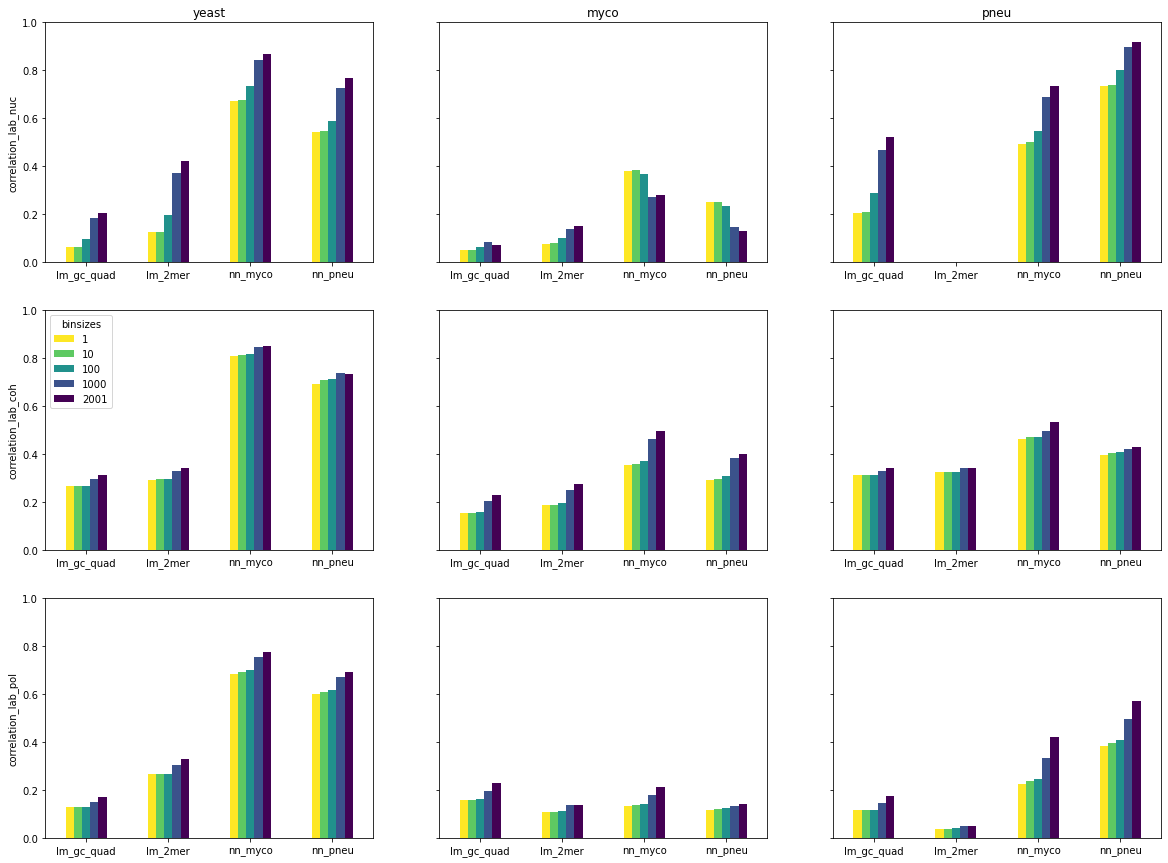

In [140]:
genomes = ['yeast', 'myco', 'pneu']
fig, axes = plt.subplots(3, 3, sharey=True, figsize=(20, 15), facecolor='w')
for i, annot in enumerate(['lab_nuc', 'lab_coh', 'lab_pol']):
    for j, results in enumerate([results_yeast, results_myco, results_pneu]):
        axes[0, j].set_title(genomes[j])
        modsuf = ''
        if j > 0:
            modsuf = '_mod_yeast'
        sliding_df, sliding_df_smooth, *_ = results
        cpt = 0
        plot_df = pd.DataFrame(index=['lm_gc_quad', 'lm_2mer', 'nn_myco', 'nn_pneu'])
        for binsize, df in [(1, sliding_df)] + list(sliding_df_smooth.items()):
            corrs_mod_yeast = utils.lineWiseCorrcoef(
                df.loc[:, [
                    # f'lm_gc_{annot}{modsuf}',
                    f'lm_gc_quad_{annot}{modsuf}',
                    # f'lm_1mer_{annot}{modsuf}',
                    f'lm_2mer_{annot}{modsuf}',
                    f'pred_{annot[-3:]}_myco',
                    f'pred_{annot[-3:]}_pneu']
                ].T.to_numpy(),
                df[annot].to_numpy())
            plot_df[binsize] = corrs_mod_yeast
        plot_df.plot.bar(color=mpl.cm.get_cmap('viridis', len(plot_df.columns)).colors[::-1],
                         ax=axes[i, j], legend=False, rot=0)
        cpt += 1
    axes[i, 0].set_ylabel(f'correlation_{annot}')
axes[1, 0].legend(title='binsizes')
axes[0, 0].set_ylim((0, 1))
plot_utils.save_fig_and_values(fig, Path(data_dir, species, 'results', 'kmers', f'corrvalues_alllabels_mycopneumodels2-14-17mid_sliding_{winsizes[0]}'))

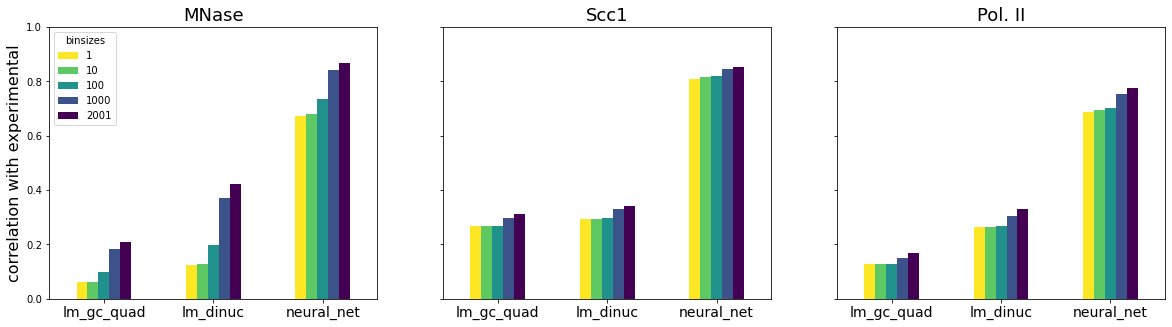

In [39]:
fig, axes = plt.subplots(1, 3, sharey=True, sharex=True, figsize=(20, 5), facecolor='w')
titles = ['MNase', 'Scc1', 'Pol. II']
for j, annot in enumerate(['lab_nuc', 'lab_coh', 'lab_pol']):
    axes[j].set_title(titles[j], fontsize=18)
    plot_df = pd.DataFrame(index=['lm_gc_quad', 'lm_dinuc', 'neural_net'])
    binsizes = [1] + list(sliding_yeast_smooth.keys())
    # df_tuple_list = [(sliding_yeast, sliding_myco, sliding_pneu)] + [
    #     (sliding_yeast_smooth[binsize], sliding_myco_smooth[binsize], sliding_pneu_smooth[binsize]) for binsize in binsizes[1:]]
    df_tuple_list = [(sliding_yeast, )] + [
        (sliding_yeast_smooth[binsize], ) for binsize in binsizes[1:]]
    for binsize, df_tuple in zip(binsizes, df_tuple_list):
        corrs_mod_yeast = utils.lineWiseCorrcoef(
            np.concatenate([
                df.loc[:, [f'lm_gc_quad_{annot}{modsuf}', f'lm_2mer_{annot}{modsuf}', f'pred_{annot[-3:]}_myco']].T.to_numpy()
                for df, modsuf in zip(df_tuple, ['', '_mod_yeast', '_mod_yeast'])
            ], axis=1),
            np.concatenate([
                df[annot].to_numpy()
                for df in df_tuple
            ])
            )
        plot_df[binsize] = corrs_mod_yeast
    plot_df.plot.bar(color=mpl.cm.get_cmap('viridis', len(plot_df.columns)).colors[::-1],
                        ax=axes[j], legend=False, rot=0)
axes[0].set_ylabel('correlation with experimental', fontsize=16)
axes[0].legend(title='binsizes')
axes[0].set_ylim((0, 1))
for ax in axes:
    for item in ax.get_xticklabels():
        item.set_fontsize(14)
# plot_utils.save_fig_and_values(fig, Path(data_dir, species, 'results', 'kmers', f'corrvalues_alllabels_merged_mycopneumodels2-14-17mid_sliding_{winsizes[0]}'))
plot_utils.save_fig_and_values(fig, Path(data_dir, species, 'results', 'kmers', 'corrvalues2-14-17mid'), format='svg')

Text(0.5, 0.98, 'binsize 100')

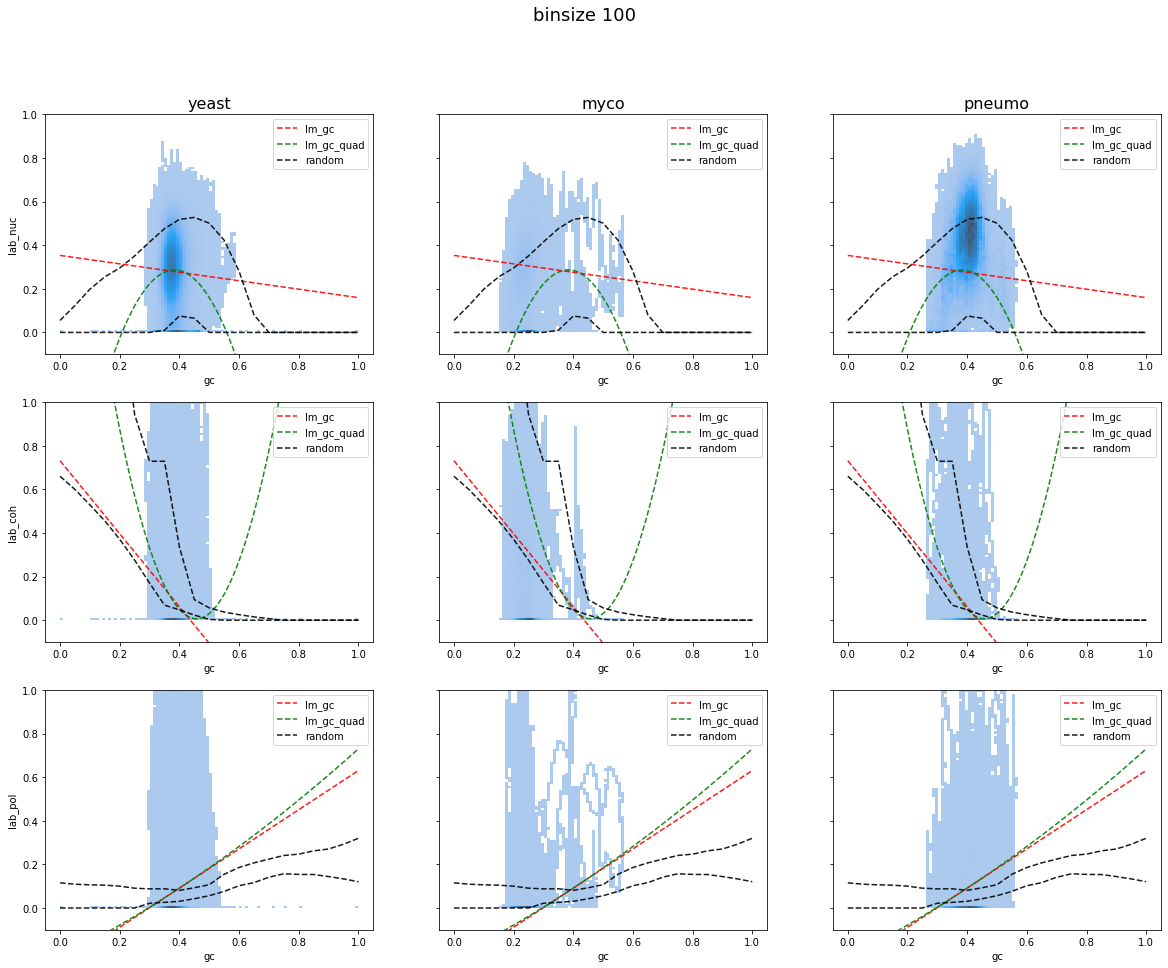

In [15]:
binsize = 100
if binsize == 1:
    df_list = [sliding_yeast, sliding_myco, sliding_pneu]
else:
    df_list = [sliding_yeast_smooth[binsize], sliding_myco_smooth[binsize], sliding_pneu_smooth[binsize]]
fig, axes = plt.subplots(3, 3, sharey='row', figsize=(20, 15), facecolor='w')
titles = ['yeast', 'myco', 'pneumo']
for j, title in enumerate(titles):
    axes[0, j].set_title(title, fontsize=16)
for i, annot in enumerate(['lab_nuc', 'lab_coh', 'lab_pol']):
    if annot == 'lab_nuc':
        rand_preds = preds_nuc_rand.reshape(n_gcs, -1)
    elif annot == 'lab_coh':
        rand_preds = preds_coh_rand.reshape(n_gcs, -1)
    elif annot == 'lab_pol':
        rand_preds = preds_pol_rand.reshape(n_gcs, -1)
    else:
        raise ValueError(f"annot can't be {annot}")
    qmin, qmax = np.quantile(rand_preds, [0.05, 0.95], axis=1)
    for j, df in enumerate(df_list):
        sns.histplot(data=df, x='gc', y=annot, binwidth=(0.01, 0.01),
                    label='experimental', ax=axes[i, j])
        hist_gcs = np.arange(0, 1.005, 0.01)
        # axes[i, j].plot(hist_gcs, models_yeast[f'lm_gc_{annot}'].predict(sm.tools.add_constant(hist_gcs)),
        #                 color='r', linestyle='--', alpha=0.9, label='lm_gc')
        # axes[i, j].plot(hist_gcs, models_yeast[f'lm_gc_quad_{annot}'].predict(sm.tools.add_constant(np.vstack([hist_gcs, hist_gcs**2]).T)),
        #                 color='g', linestyle='--', alpha=0.9, label='lm_gc_quad')
        axes[i, j].plot(gcs, qmin, color='k', linestyle='--', alpha=0.9, label='random')
        axes[i, j].plot(gcs, qmax, color='k', linestyle='--', alpha=0.9)
        axes[i, j].legend(loc='upper right').set_title('')
    axes[i, 0].set_ylabel(annot)
    # if annot in ['lab_nuc', 'lab_coh']:
    #     axes[i, 0].set_ylim(top=0.4)
    #     axes[i, 0].set_ylim(bottom=-0.01)
    # else:
    axes[i, 0].set_ylim(bottom=-0.1, top=1)
fig.suptitle(f'binsize {binsize}', fontsize=18)

Text(0.5, 0.98, 'binsize 100')

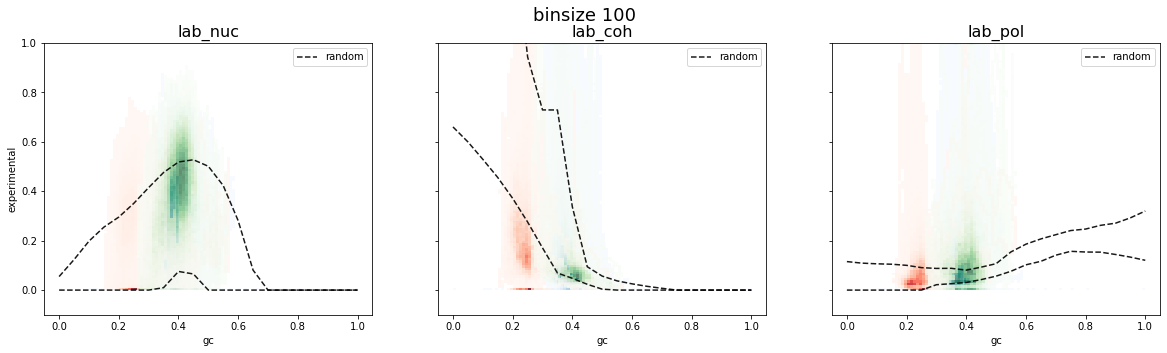

In [145]:
binsize = 100
if binsize == 1:
    df_list = [sliding_yeast, sliding_myco, sliding_pneu]
else:
    df_list = [sliding_yeast_smooth[binsize], sliding_myco_smooth[binsize], sliding_pneu_smooth[binsize]]
fig, axes = plt.subplots(1, 3, sharey='row', figsize=(20, 5), facecolor='w')
for j, annot in enumerate(['lab_nuc', 'lab_coh', 'lab_pol']):
    axes[j].set_title(annot, fontsize=16)
    if annot == 'lab_nuc':
        rand_preds = preds_nuc_rand.reshape(n_gcs, -1)
    elif annot == 'lab_coh':
        rand_preds = preds_coh_rand.reshape(n_gcs, -1)
    elif annot == 'lab_pol':
        rand_preds = preds_pol_rand.reshape(n_gcs, -1)
    else:
        raise ValueError(f"annot can't be {annot}")
    qmin, qmax = np.quantile(rand_preds, [0.05, 0.95], axis=1)
    cmaps = ['Blues', 'Reds', 'Greens']
    alphas= [1, 0.8, 0.6]
    for df, cmap, alpha in zip(df_list, cmaps, alphas):
        sns.histplot(data=df, x='gc', y=annot, binwidth=(0.01, 0.01),
                     label='experimental', ax=axes[j], cmap=cmap, alpha=alpha)
    hist_gcs = np.arange(0, 1.005, 0.01)
    axes[j].plot(gcs, qmin, color='k', linestyle='--', alpha=0.9, label='random')
    axes[j].plot(gcs, qmax, color='k', linestyle='--', alpha=0.9)
    axes[j].legend(loc='upper right').set_title('')
axes[0].set_ylabel('experimental')
axes[0].set_ylim(bottom=-0.1, top=1)
fig.suptitle(f'binsize {binsize}', fontsize=18)

Text(0.5, 0.98, 'binsize 1')

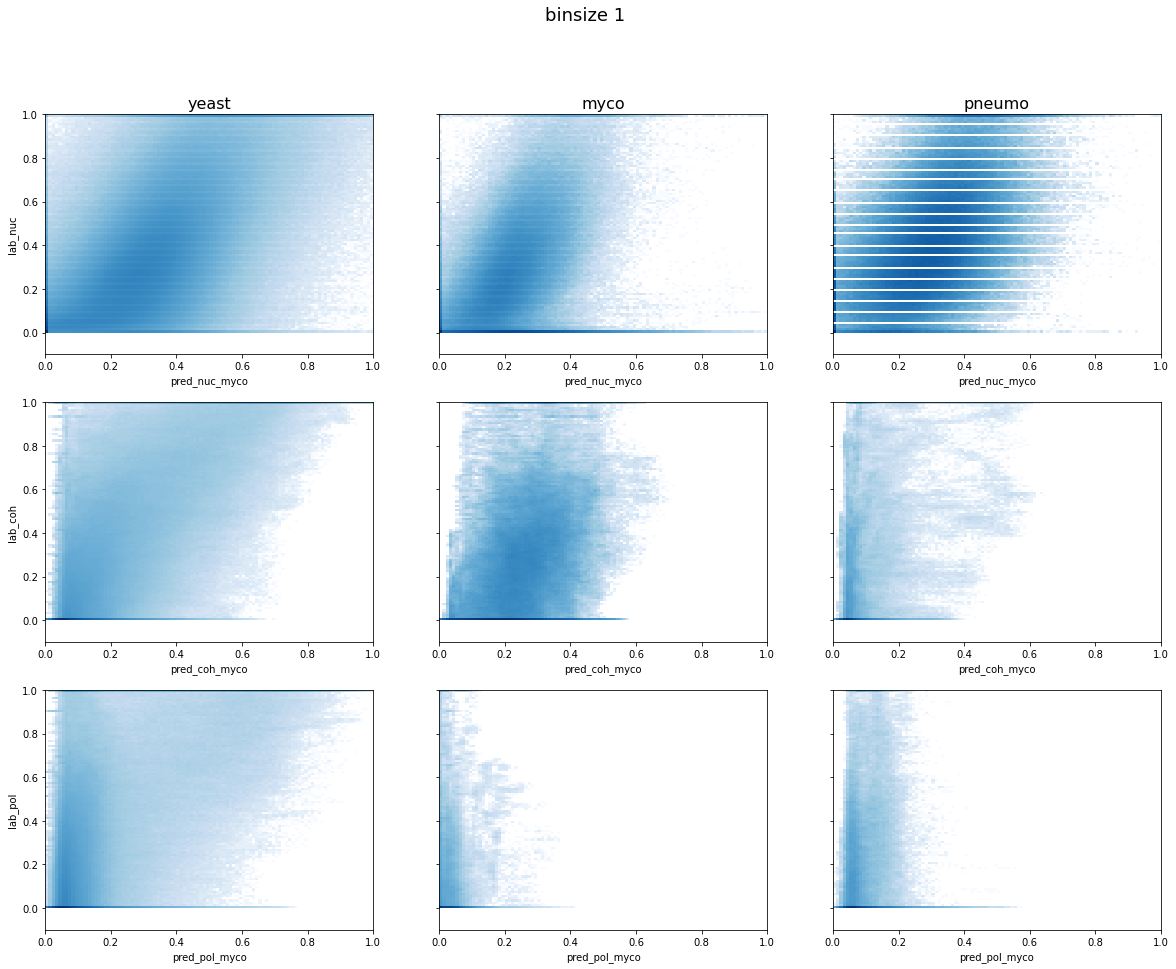

In [34]:
binsize = 1
if binsize == 1:
    df_list = [sliding_yeast, sliding_myco, sliding_pneu]
else:
    df_list = [sliding_yeast_smooth[binsize], sliding_myco_smooth[binsize], sliding_pneu_smooth[binsize]]
fig, axes = plt.subplots(3, 3, sharey='row', figsize=(20, 15), facecolor='w')
titles = ['yeast', 'myco', 'pneumo']
for j, title in enumerate(titles):
    axes[0, j].set_title(title, fontsize=16)
for i, annot in enumerate(['lab_nuc', 'lab_coh', 'lab_pol']):
    for j, df in enumerate(df_list):
        axes[i, j].hist2d(df[f'pred_{annot[-3:]}_myco'], df[annot], bins=100, range=((0, 1), (0, 1)),
                          cmap='Blues', norm=mpl.colors.LogNorm())
        axes[i, j].set_xlabel(f'pred_{annot[-3:]}_myco')
    axes[i, 0].set_ylabel(annot)
    # if annot in ['lab_nuc', 'lab_coh']:
    #     axes[i, 0].set_ylim(top=0.4)
    #     axes[i, 0].set_ylim(bottom=-0.01)
    # else:
    axes[i, 0].set_ylim(bottom=-0.1, top=1)
fig.suptitle(f'binsize {binsize}', fontsize=18)

Text(0.5, 0.98, 'binsize 2001')

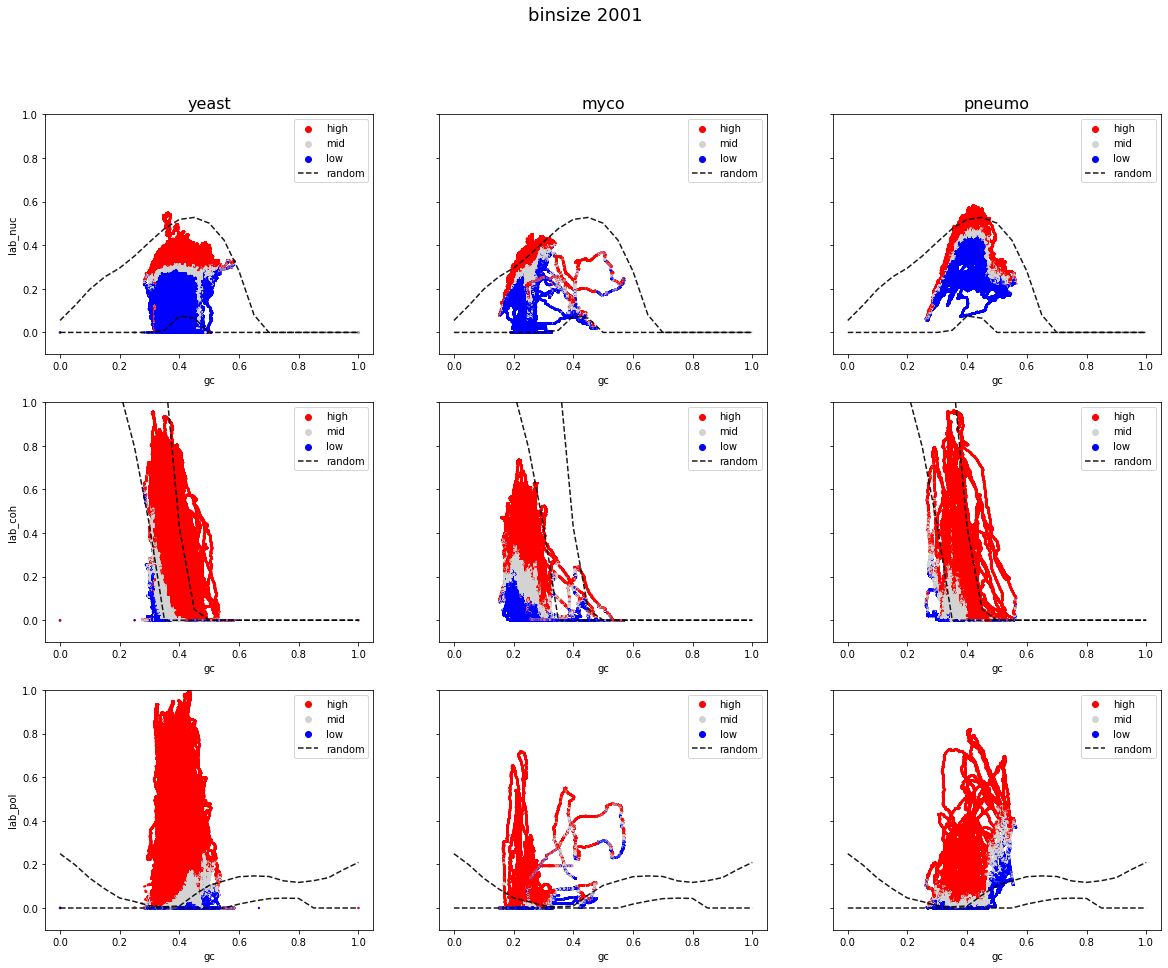

In [18]:
binsize = 2001
if binsize == 1:
    df_list = [sliding_yeast, sliding_myco, sliding_pneu]
else:
    df_list = [sliding_yeast_smooth[binsize], sliding_myco_smooth[binsize], sliding_pneu_smooth[binsize]]
fig, axes = plt.subplots(3, 3, sharey='row', figsize=(20, 15), facecolor='w')
titles = ['yeast', 'myco', 'pneumo']
for j, title in enumerate(titles):
    axes[0, j].set_title(title, fontsize=16)
for i, annot in enumerate(['lab_nuc', 'lab_coh', 'lab_pol']):
    if annot == 'lab_nuc':
        rand_preds = preds_nuc_rand.reshape(n_gcs, -1)
    elif annot == 'lab_coh':
        rand_preds = preds_coh_rand.reshape(n_gcs, -1)
    elif annot == 'lab_pol':
        rand_preds = preds_pol_rand.reshape(n_gcs, -1)
    else:
        raise ValueError(f"annot can't be {annot}")
    qmin, qmax = np.quantile(rand_preds, [0.05, 0.95], axis=1)
    for j, df in enumerate(df_list):
        if j == 0:
            modsuf = ''
        else:
            modsuf = '_mod_yeast'
        sns.scatterplot(data=df.loc[df[f'sep_{annot}'] != 'discarded', :].loc[:, :], x='gc', y=annot,
                        hue=f'sep_{annot}', hue_order=['high', 'mid', 'low'], palette=['r', 'lightgray', 'b'],
                        ec=None, s=5, ax=axes[i, j])
        axes[i, j].plot(gcs, qmin, color='k', linestyle='--', alpha=0.9, label='random')
        axes[i, j].plot(gcs, qmax, color='k', linestyle='--', alpha=0.9)
        axes[i, j].legend(loc='upper right').set_title('')
    axes[i, 0].set_ylabel(annot)
    # if annot in ['lab_nuc', 'lab_coh']:
    #     axes[i, 0].set_ylim(top=0.4)
    #     axes[i, 0].set_ylim(bottom=-0.01)
    # else:
    axes[i, 0].set_ylim(bottom=-0.1, top=1)
fig.suptitle(f'binsize {binsize}', fontsize=18)

In [ ]:
annot = 'lab_pol'
binsize = 100
if binsize == 1:
    df_list = [sliding_yeast, sliding_myco, sliding_pneu]
else:
    df_list = [sliding_yeast_smooth[binsize], sliding_myco_smooth[binsize], sliding_pneu_smooth[binsize]]
fig, axes = plt.subplots(2, 3, sharey=True, figsize=(20, 10), facecolor='w')
titles = ['yeast', 'myco', 'pneumo']
for j, title in enumerate(titles):
    axes[0, j].set_title(title, fontsize=16)
if annot == 'lab_nuc':
    rand_preds = preds_nuc_rand.reshape(n_gcs, -1)
elif annot == 'lab_coh':
    rand_preds = preds_coh_rand.reshape(n_gcs, -1)
elif annot == 'lab_pol':
    rand_preds = preds_pol_rand.reshape(n_gcs, -1)
else:
    raise ValueError(f"annot can't be {annot}")
qmin, qmax = np.quantile(rand_preds, [0.05, 0.95], axis=1)
for j, df in enumerate(df_list):
    if j == 0:
        modsuf = ''
    else:
        modsuf = '_mod_yeast'
    sns.scatterplot(data=df.loc[df[f'sep_{annot}'] != 'discarded', :].loc[50::100, :], x='gc', y=annot,
                    hue=f'sep_{annot}', hue_order=['high', 'mid', 'low'], palette=['r', 'lightgray', 'b'],
                    ec=None, s=5, ax=axes[0, j])
    axes[0, j].plot(gcs, qmin, color='k', linestyle='--', alpha=0.9, label='random')
    axes[0, j].plot(gcs, qmax, color='k', linestyle='--', alpha=0.9)
    axes[0, j].legend(loc='upper right').set_title('')

    sns.scatterplot(data=df.loc[df[f'sep_pred_{annot[-3:]}_myco'] != 'discarded', :].loc[50::100, :], x='gc', y=f'pred_{annot[-3:]}3',
                    hue=f'sep_pred_{annot[-3:]}3', hue_order=['high', 'mid', 'low'], palette=['r', 'lightgray', 'b'],
                    ec=None, s=5, ax=axes[1, j])
    axes[1, j].plot(gcs, qmin, color='k', linestyle='--', alpha=0.9, label='random')
    axes[1, j].plot(gcs, qmax, color='k', linestyle='--', alpha=0.9)
    axes[1, j].legend(loc='upper right').set_title('')
axes[0, 0].set_ylabel('experimental')
axes[1, 0].set_ylabel('prediction')
if annot in ['lab_nuc', 'lab_coh']:
    axes[0, 0].set_ylim(top=0.4)
    axes[0, 0].set_ylim(bottom=-0.01)
else:
    axes[0, 0].set_ylim(bottom=-0.1)
fig.suptitle(f'{annot} with binsize {binsize}', fontsize=18)

In [11]:
def window_summary(one_hot, signals, binsize, on, ks=[2, 1], includeN=True):
    if on == 'yeast':
        window_one_hot, window_signals = {}, {}
        for key, oh in one_hot.items():
            if True: # key[:3] == 'chr': #
                window_one_hot[key] = utils.chunk_regions(oh, binsize)
                window_signals[key] = utils.chunk_regions(np.vstack([signal[key] for signal in signals.values()]).T, binsize).mean(axis=1)
        window_one_hot = np.concatenate(list(window_one_hot.values()), axis=0)
        window_signals = np.concatenate(list(window_signals.values()), axis=0)
    else:
        window_one_hot = utils.chunk_regions(one_hot, binsize)
        window_signals = utils.chunk_regions(np.vstack([signal[on] for signal in signals.values()]).T, binsize).mean(axis=1)
    if not includeN:
        noN_mask = np.sum(window_one_hot, axis=(1, 2)) == binsize
        window_one_hot = window_one_hot[noN_mask]
        window_signals = window_signals[noN_mask]
    window_df = pd.concat([pd.DataFrame(utils.GC_content(window_one_hot), columns=['gc']),
                           pd.DataFrame(window_signals, columns=signals.keys())],
                          axis=1)
    window_kmers = {}
    for k in ks:
        window_kmers[k] = utils.kmer_counts_by_seq(window_one_hot, k, includeN=includeN)
    return window_df, window_one_hot, window_kmers

In [12]:
one_hots = one_hots_myco
one_hots.update(one_hots_pneu)
list(one_hots.keys())

['chrI',
 'chrII',
 'chrIII',
 'chrIV',
 'chrV',
 'chrVI',
 'chrVII',
 'chrVIII',
 'chrIX',
 'chrX',
 'chrXI',
 'chrXII',
 'chrXIII',
 'chrXIV',
 'chrXV',
 'chrXVI',
 'Mmmyco',
 'I',
 'II',
 'III',
 'IV',
 'V',
 'VI',
 'VII',
 'VIII',
 'IX',
 'X',
 'XI',
 'XII',
 'XIII',
 'XIV',
 'XV',
 'XVI',
 'Mpneumo']

In [68]:
binsize = 100
ks = [] # [2, 1] #
signals_lab = {
    'lab_nuc': labels_nuc,
    'lab_coh': labels_coh,
    'lab_pol': labels_pol,
    'pred_nuc': preds_nuc_myco,
    'pred_coh': preds_coh_myco,
    'pred_pol': preds_pol_myco,
}
window_yeast, window_one_hot_yeast, window_kmers_yeast = window_summary(one_hots_yeast, signals_lab, binsize, 'yeast', ks=ks, includeN=False)
window_myco, window_one_hot_myco, window_kmers_myco = window_summary(one_hot_myco, signals_lab, binsize, 'Mmmyco', ks=ks, includeN=False)
window_pneu, window_one_hot_pneu, window_kmers_pneu = window_summary(one_hot_pneu, signals_lab, binsize, 'Mpneumo', ks=ks, includeN=False)
# window_full, window_one_hot_full, window_kmers_full = window_summary(one_hots, signals_lab, binsize, 'yeast', ks=ks, includeN=False)

In [69]:
window_yeast['from'] = 'yeast'
window_myco['from'] = 'myco'
window_pneu['from'] = 'pneu'
window_full = pd.concat([window_yeast, window_myco, window_pneu])
window_full.index = np.arange(len(window_full))
window_full

,gc,lab_nuc,lab_coh,lab_pol,pred_nuc,pred_coh,pred_pol,from
0,0.62,0.015881,0.000000,0.000000,0.0,0.081030,0.0,yeast
1,0.58,0.117724,0.037195,0.006908,0.0,0.099814,0.0,yeast
2,0.52,0.114959,0.188773,0.017144,0.0,0.128801,0.0,yeast
3,0.51,0.484417,0.246025,0.008014,0.0,0.138191,0.0,yeast
4,0.44,0.283794,0.241307,0.011206,0.0,0.178064,0.0,yeast
...,...,...,...,...,...,...,...,...
262835,0.30,0.212375,0.045877,0.211454,0.0,0.045278,0.0,pneu
262836,0.39,0.800125,0.047805,0.140650,0.0,0.045334,0.0,pneu
262837,0.45,0.143750,0.038533,0.093295,0.0,0.046727,0.0,pneu
262838,0.63,0.023625,0.026357,0.316951,0.0,0.044207,0.0,pneu


In [59]:
np.sum(window_full['lab_nuc'] == 0), np.sum(window_full['lab_coh'] == 0), np.sum(window_full['lab_pol'] == 0), np.sum((window_full['lab_nuc'] == 0) & (window_full['lab_coh'] == 0) & (window_full['lab_pol'] == 0))

(13703, 8624, 16550, 8140)

In [70]:
window_yeast = window_yeast[(window_yeast['lab_nuc'] != 0) | (window_yeast['lab_coh'] != 0) | (window_yeast['lab_pol'] != 0)]
window_yeast.index = np.arange(len(window_yeast))
window_myco = window_myco[(window_myco['lab_nuc'] != 0) | (window_myco['lab_coh'] != 0) | (window_myco['lab_pol'] != 0)]
window_myco.index = np.arange(len(window_myco))
window_pneu = window_pneu[(window_pneu['lab_nuc'] != 0) | (window_pneu['lab_coh'] != 0) | (window_pneu['lab_pol'] != 0)]
window_pneu.index = np.arange(len(window_pneu))
window_full = window_full[(window_full['lab_nuc'] != 0) | (window_full['lab_coh'] != 0) | (window_full['lab_pol'] != 0)]
window_full.index = np.arange(len(window_full))

In [ ]:
def seperate_3(window_gc, window_values):
    # Sort values by pred value
    sort_idx = np.argsort(window_values)
    sorted_gc = window_gc[sort_idx]
    # Create mask of values to take as low or high
    low_mask = np.zeros(len(sorted_gc), dtype=bool)
    mid_mask = np.zeros(len(sorted_gc), dtype=bool)
    high_mask = np.zeros(len(sorted_gc), dtype=bool)
    for gc, count in zip(*np.unique(window_gc, return_counts=True)):
        if count < 3:
            continue
        gc_idxes = (sorted_gc == gc).nonzero()[0]
        low_mask[gc_idxes[:count // 3]] = 1
        mid_mask[gc_idxes[count // 3 : -(count // 3)]] = 1
        high_mask[gc_idxes[-(count // 3):]] = 1
    # Reverse sort the mask
    revsort_idx = sort_idx.argsort()
    return low_mask[revsort_idx], mid_mask[revsort_idx], high_mask[revsort_idx]

In [71]:
div = 3
seps = np.array(['discarded', 'low', 'high', 'mid'])
window_yeast_seps = {}
window_myco_seps = {}
window_pneu_seps = {}
window_full_seps = {}
for part1 in ['lab', 'pred']:
    for part2 in ['nuc', 'coh', 'pol']:
        annot = f'{part1}_{part2}'
        window_yeast_seps[f'sep_{annot}'] = np.array(['discarded']*len(window_yeast))
        # low_mask, high_mask = seperate_low_high(window_yeast.loc[noN_mask, 'gc'].to_numpy(), window_yeast.loc[noN_mask, annot].to_numpy(), div=div)
        # window_yeast_seps[f'sep_{annot}'][noN_mask] = seps[2*high_mask.astype(int) + low_mask.astype(int)]
        low_mask, mid_mask, high_mask = seperate_3(window_yeast['gc'].to_numpy(), window_yeast[annot].to_numpy())
        window_yeast_seps[f'sep_{annot}'] = seps[3*mid_mask.astype(int) + 2*high_mask.astype(int) + low_mask.astype(int)]

        window_myco_seps[f'sep_{annot}'] = np.array(['discarded']*len(window_myco))
        low_mask, mid_mask, high_mask = seperate_3(window_myco['gc'].to_numpy(), window_myco[annot].to_numpy())
        window_myco_seps[f'sep_{annot}'] = seps[3*mid_mask.astype(int) + 2*high_mask.astype(int) + low_mask.astype(int)]

        window_pneu_seps[f'sep_{annot}'] = np.array(['discarded']*len(window_pneu))
        low_mask, mid_mask, high_mask = seperate_3(window_pneu['gc'].to_numpy(), window_pneu[annot].to_numpy())
        window_pneu_seps[f'sep_{annot}'] = seps[3*mid_mask.astype(int) + 2*high_mask.astype(int) + low_mask.astype(int)]

        window_full_seps[f'sep_{annot}'] = np.array(['discarded']*len(window_full))
        low_mask, mid_mask, high_mask = seperate_3(window_full['gc'].to_numpy(), window_full[annot].to_numpy())
        window_full_seps[f'sep_{annot}'] = seps[3*mid_mask.astype(int) + 2*high_mask.astype(int) + low_mask.astype(int)]
try:
    window_yeast = window_yeast.join(pd.DataFrame(window_yeast_seps))
    window_myco = window_myco.join(pd.DataFrame(window_myco_seps))
    window_pneu = window_pneu.join(pd.DataFrame(window_pneu_seps))
    window_full = window_full.join(pd.DataFrame(window_full_seps))
except ValueError:
    window_yeast.loc[:, list(window_yeast_seps.keys())] = pd.DataFrame(window_yeast_seps)
    window_myco.loc[:, list(window_myco_seps.keys())] = pd.DataFrame(window_myco_seps)
    window_pneu.loc[:, list(window_pneu_seps.keys())] = pd.DataFrame(window_pneu_seps)
    window_full.loc[:, list(window_full_seps.keys())] = pd.DataFrame(window_full_seps)

In [72]:
window_myco[window_myco['gc'] == 0.64]

,gc,lab_nuc,lab_coh,lab_pol,pred_nuc,pred_coh,pred_pol,from,sep_lab_nuc,sep_lab_coh,sep_lab_pol,sep_pred_nuc,sep_pred_coh,sep_pred_pol
1,0.64,0.190596,0.007061,0.956444,0.00000,0.077859,0.000000,myco,mid,low,high,low,mid,low
7,0.64,0.232168,0.026779,0.333608,0.00000,0.121875,0.097466,myco,high,high,low,mid,high,mid
11400,0.64,0.180786,0.010936,0.391986,0.00294,0.020107,0.235616,myco,low,mid,mid,high,low,high


Text(0.5, 0.98, 'lab_coh')

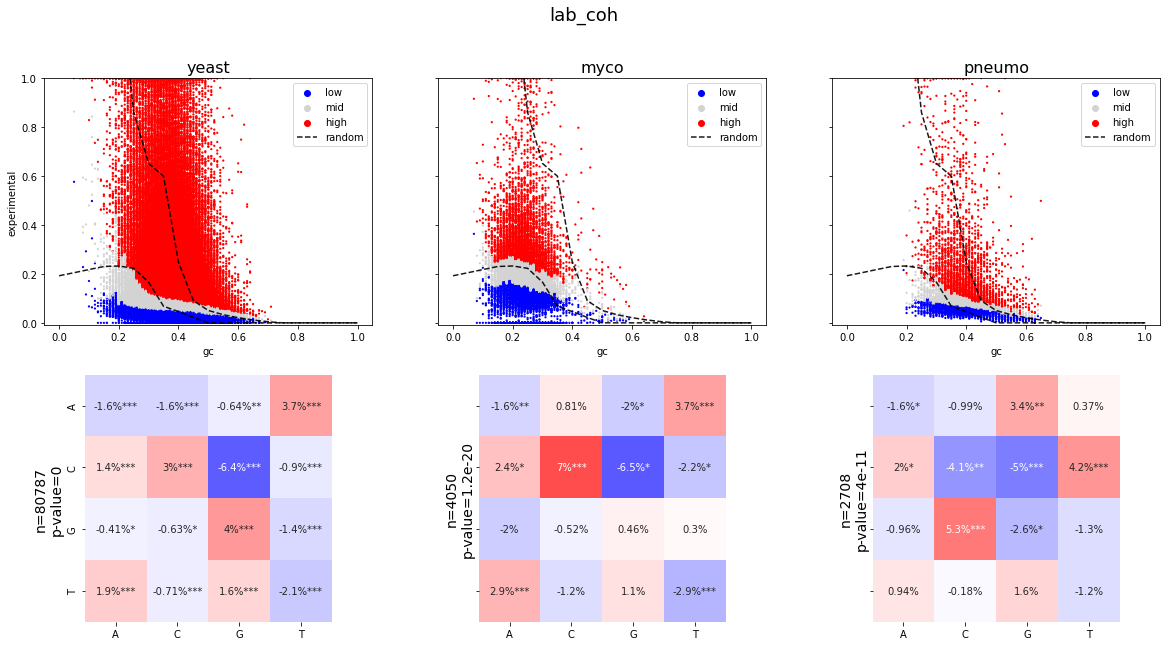

In [22]:
annot = 'lab_coh'
k = 2
stars_thres = np.array([0.05, 1e-2, 1e-3, -1]).reshape(1, -1)
fig, axes = plt.subplots(2, 3, sharey='row', figsize=(20, 10), facecolor='w')
if annot[-3:] == 'nuc':
    rand_preds = preds_nuc_rand_reps
elif annot[-3:] == 'coh':
    rand_preds = preds_coh_rand_reps
elif annot[-3:] == 'pol':
    rand_preds = preds_pol_rand_reps
else:
    raise ValueError(f"annot can't be {annot}")
# rand_preds = rand_preds.reshape(21, 6, -1)[:, ::2, :].reshape(21, -1)
qmin, qmax = np.quantile(rand_preds, [0.05, 0.95], axis=1)
titles = ['yeast', 'myco', 'pneumo']
for j, title in enumerate(titles):
    axes[0, j].set_title(title, fontsize=16)
for j, (window_df, window_one_hot) in enumerate([(window_yeast, window_one_hot_yeast),
                                                 (window_myco, window_one_hot_myco),
                                                 (window_pneu, window_one_hot_pneu)]):
    sns.scatterplot(ax=axes[0, j], data=window_df.loc[window_df[f'sep_{annot}'] != 'discarded'], x='gc', y=annot,
                    hue=f'sep_{annot}', hue_order=['low', 'mid', 'high'], palette=['b', 'lightgray', 'r'],
                    ec=None, s=5)
    axes[0, j].plot(gcs, qmin, color='k', linestyle='--', alpha=0.9, label='random')
    axes[0, j].plot(gcs, qmax, color='k', linestyle='--', alpha=0.9)
    axes[0, j].legend().set_title('')

    low_mask = window_df.loc[:, f'sep_{annot}'] == 'low'
    high_mask = window_df.loc[:, f'sep_{annot}'] == 'high'
    df_low = utils.kmer_counts(window_one_hot[low_mask], k, includeN=False)
    df_high = utils.kmer_counts(window_one_hot[high_mask], k, includeN=False)
    df_pvals = pd.Series(
        0.,
        index=df_low.index)
    for kmer in df_low.index:
        df_pvals.loc[kmer] = scipy.stats.chi2_contingency(
            [[df_high.loc[kmer], df_high.loc[df_high.index!=kmer].sum()],
             [df_low.loc[kmer], df_low.loc[df_low.index!=kmer].sum()]]
        )[1]
    global_pval = scipy.stats.chi2_contingency(pd.concat([df_high, df_low], axis=1))[1]
    df_pvals2D = df_pvals.sort_index()
    
    df_percdiff = (df_high - df_low) / (df_high + df_low) * 200
    df_percdiff2D = df_percdiff.sort_index()

    stars = np.argmax(df_pvals2D.to_numpy().reshape(16, 1) > stars_thres, axis=1)
    annotation = np.array([f"{format(v, '.2g')}%" + "*"*s for v, s in zip(df_percdiff2D.values, stars)]).reshape(4, 4)
    sns.heatmap(df_percdiff2D.unstack(), cmap='seismic', annot=annotation, fmt='', ax=axes[1, j], center=0, vmax=20, cbar=False, square=True)
    lab = (f'n={low_mask.sum()}\n'
           f'p-value={format(global_pval, ".2g")}')
    axes[1, j].set_ylabel(lab, fontsize=14)

axes[0, 1].set_ylim(bottom=-0.01, top=1)
axes[0, 0].set_ylabel('experimental')
fig.suptitle(annot, fontsize=18)

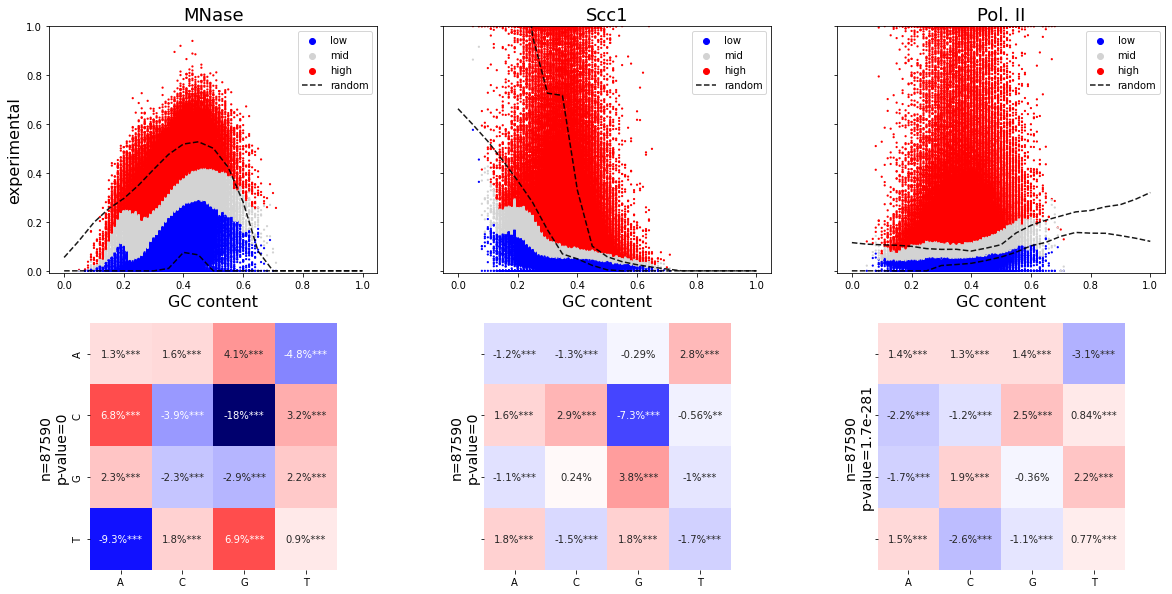

In [45]:
k = 2
stars_thres = np.array([0.05, 1e-2, 1e-3, -1]).reshape(1, -1)
fig, axes = plt.subplots(2, 3, sharey='row', figsize=(20, 10), facecolor='w')
annots = ['lab_nuc', 'lab_coh', 'lab_pol']
titles = ['MNase', 'Scc1', 'Pol. II']
for j, annot in enumerate(annots):
    if annot[-3:] == 'nuc':
        rand_preds = preds_nuc_rand.reshape(n_gcs, -1)
    elif annot[-3:] == 'coh':
        rand_preds = preds_coh_rand.reshape(n_gcs, -1)
    elif annot[-3:] == 'pol':
        rand_preds = preds_pol_rand.reshape(n_gcs, -1)
    else:
        raise ValueError(f"annot can't be {annot}")
    qmin, qmax = np.quantile(rand_preds, [0.05, 0.95], axis=1)
    axes[0, j].set_title(titles[j], fontsize=18)
    sns.scatterplot(ax=axes[0, j], data=window_full.loc[window_full[f'sep_{annot}'] != 'discarded'], x='gc', y=annot,
                    hue=f'sep_{annot}', hue_order=['low', 'mid', 'high'], palette=['b', 'lightgray', 'r'],
                    ec=None, s=5)
    axes[0, j].plot(gcs, qmin, color='k', linestyle='--', alpha=0.9, label='random')
    axes[0, j].plot(gcs, qmax, color='k', linestyle='--', alpha=0.9)
    axes[0, j].legend().set_title('')
    axes[0, j].set_xlabel('GC content', fontsize=16)

    low_mask = window_full.loc[:, f'sep_{annot}'] == 'low'
    high_mask = window_full.loc[:, f'sep_{annot}'] == 'high'
    df_low = utils.kmer_counts(window_one_hot_full[low_mask], k, includeN=False)
    df_high = utils.kmer_counts(window_one_hot_full[high_mask], k, includeN=False)
    df_pvals = pd.Series(
        0.,
        index=df_low.index)
    for kmer in df_low.index:
        df_pvals.loc[kmer] = scipy.stats.chi2_contingency(
            [[df_high.loc[kmer], df_high.loc[df_high.index!=kmer].sum()],
             [df_low.loc[kmer], df_low.loc[df_low.index!=kmer].sum()]]
        )[1]
    global_pval = scipy.stats.chi2_contingency(pd.concat([df_high, df_low], axis=1))[1]
    df_pvals2D = df_pvals.sort_index()
    
    df_percdiff = (df_high - df_low) / (df_high + df_low) * 200
    df_percdiff2D = df_percdiff.sort_index()

    stars = np.argmax(df_pvals2D.to_numpy().reshape(16, 1) > stars_thres, axis=1)
    annotation = np.array([f"{format(v, '.2g')}%" + "*"*s for v, s in zip(df_percdiff2D.values, stars)]).reshape(4, 4)
    sns.heatmap(df_percdiff2D.unstack(), cmap='seismic', annot=annotation, fmt='', ax=axes[1, j], center=0, vmax=20, cbar=False, square=True)
    lab = (f'n={low_mask.sum()}\n'
           f'p-value={format(global_pval, ".2g")}')
    axes[1, j].set_ylabel(lab, fontsize=14)

axes[0, 1].set_ylim(bottom=-0.01, top=1)
axes[0, 0].set_ylabel('experimental', fontsize=16)
plot_utils.save_fig_and_values(fig, Path(data_dir, species, 'results', 'kmers', 'scatter_binsize100'), format='svg')

../shared_folder/SCerevisiae/results/kmers/scatter_binsize100.svg exists, changing filename to ../shared_folder/SCerevisiae/results/kmers/scatter_binsize100(1).svg
../shared_folder/SCerevisiae/results/kmers/scatter_binsize100.pickle exists, changing filename to ../shared_folder/SCerevisiae/results/kmers/scatter_binsize100(1).pickle


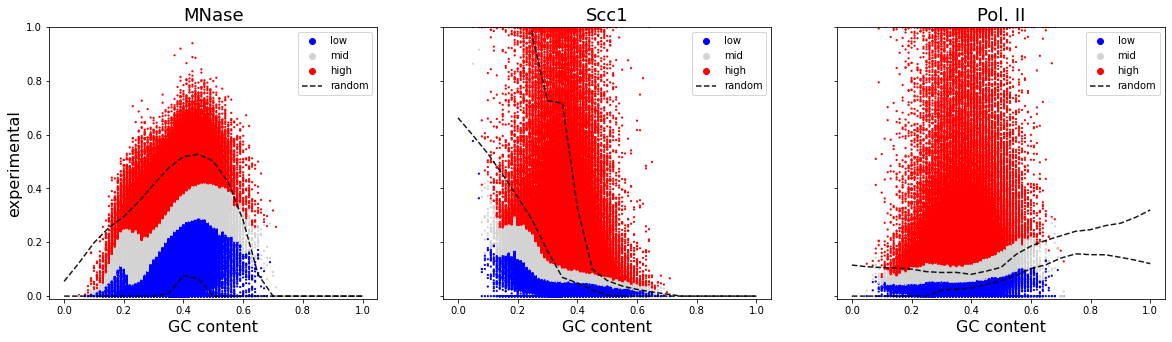

In [46]:
fig, axes = plt.subplots(1, 3, sharey='row', figsize=(20, 5), facecolor='w')
annots = ['lab_nuc', 'lab_coh', 'lab_pol']
titles = ['MNase', 'Scc1', 'Pol. II']
for j, annot in enumerate(annots):
    if annot[-3:] == 'nuc':
        rand_preds = preds_nuc_rand.reshape(n_gcs, -1)
    elif annot[-3:] == 'coh':
        rand_preds = preds_coh_rand.reshape(n_gcs, -1)
    elif annot[-3:] == 'pol':
        rand_preds = preds_pol_rand.reshape(n_gcs, -1)
    else:
        raise ValueError(f"annot can't be {annot}")
    qmin, qmax = np.quantile(rand_preds, [0.05, 0.95], axis=1)
    axes[j].set_title(titles[j], fontsize=18)
    sns.scatterplot(ax=axes[j], data=window_full.loc[window_full[f'sep_{annot}'] != 'discarded'], x='gc', y=annot,
                    hue=f'sep_{annot}', hue_order=['low', 'mid', 'high'], palette=['b', 'lightgray', 'r'],
                    ec=None, s=5)
    axes[j].plot(gcs, qmin, color='k', linestyle='--', alpha=0.9, label='random')
    axes[j].plot(gcs, qmax, color='k', linestyle='--', alpha=0.9)
    axes[j].legend().set_title('')
    axes[j].set_xlabel('GC content', fontsize=16)

axes[0].set_ylim(bottom=-0.01, top=1)
axes[0].set_ylabel('experimental', fontsize=16)
plot_utils.save_fig_and_values(fig, Path(data_dir, species, 'results', 'kmers', 'scatter_binsize100'), format='svg')

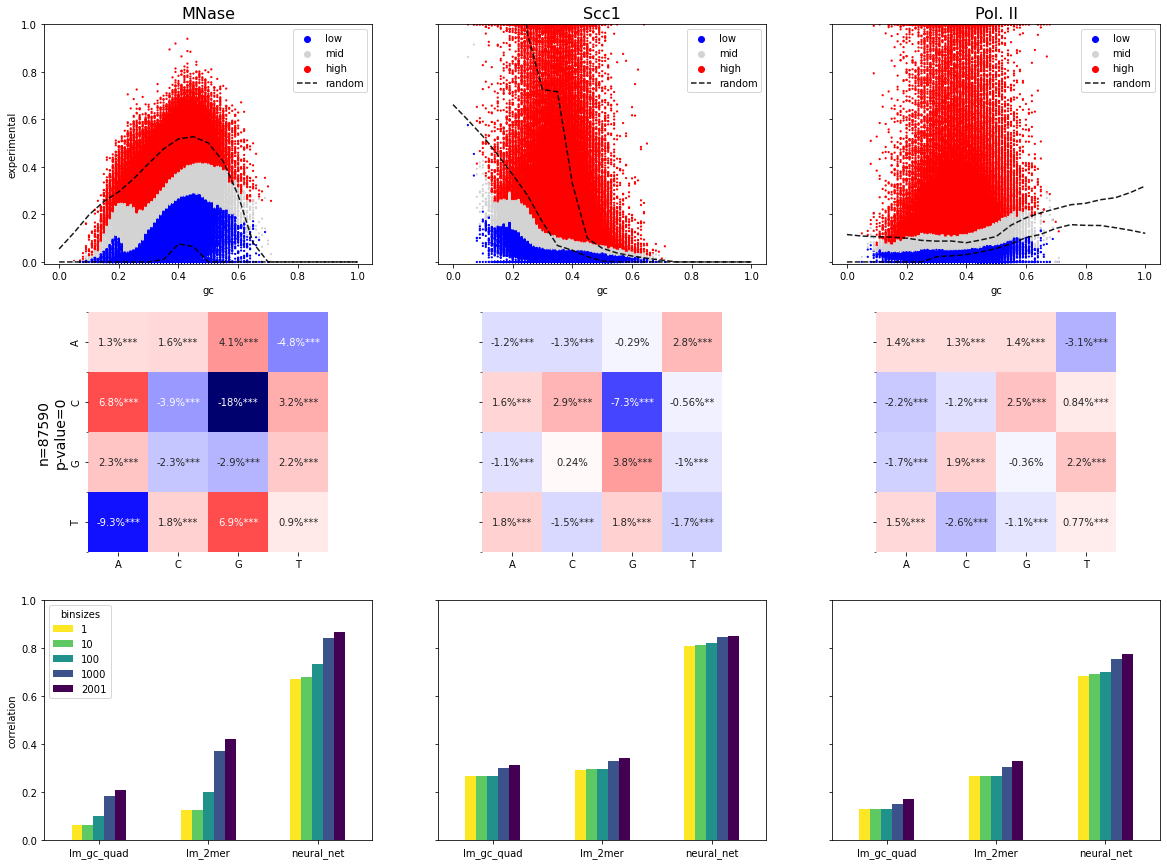

In [14]:
k = 2
stars_thres = np.array([0.05, 1e-2, 1e-3, -1]).reshape(1, -1)
fig, axes = plt.subplots(3, 3, sharey='row', figsize=(20, 15), facecolor='w')
annots = ['lab_nuc', 'lab_coh', 'lab_pol']
titles = ['MNase', 'Scc1', 'Pol. II']
for j, annot in enumerate(annots):
    # Row 0
    if annot[-3:] == 'nuc':
        rand_preds = preds_nuc_rand.reshape(n_gcs, -1)
    elif annot[-3:] == 'coh':
        rand_preds = preds_coh_rand.reshape(n_gcs, -1)
    elif annot[-3:] == 'pol':
        rand_preds = preds_pol_rand.reshape(n_gcs, -1)
    else:
        raise ValueError(f"annot can't be {annot}")
    qmin, qmax = np.quantile(rand_preds, [0.05, 0.95], axis=1)
    axes[0, j].set_title(titles[j], fontsize=16)
    sns.scatterplot(ax=axes[0, j], data=window_full.loc[window_full[f'sep_{annot}'] != 'discarded'], x='gc', y=annot,
                    hue=f'sep_{annot}', hue_order=['low', 'mid', 'high'], palette=['b', 'lightgray', 'r'],
                    ec=None, s=5)
    axes[0, j].plot(gcs, qmin, color='k', linestyle='--', alpha=0.9, label='random')
    axes[0, j].plot(gcs, qmax, color='k', linestyle='--', alpha=0.9)
    axes[0, j].legend().set_title('')

    # Row 1
    low_mask = window_full.loc[:, f'sep_{annot}'] == 'low'
    high_mask = window_full.loc[:, f'sep_{annot}'] == 'high'
    df_low = utils.kmer_counts(window_one_hot_full[low_mask], k, includeN=False)
    df_high = utils.kmer_counts(window_one_hot_full[high_mask], k, includeN=False)
    df_pvals = pd.Series(
        0.,
        index=df_low.index)
    for kmer in df_low.index:
        df_pvals.loc[kmer] = scipy.stats.chi2_contingency(
            [[df_high.loc[kmer], df_high.loc[df_high.index!=kmer].sum()],
             [df_low.loc[kmer], df_low.loc[df_low.index!=kmer].sum()]]
        )[1]
    global_pval = scipy.stats.chi2_contingency(pd.concat([df_high, df_low], axis=1))[1]
    df_pvals2D = df_pvals.sort_index()
    
    df_percdiff = (df_high - df_low) / (df_high + df_low) * 200
    df_percdiff2D = df_percdiff.sort_index()

    stars = np.argmax(df_pvals2D.to_numpy().reshape(16, 1) > stars_thres, axis=1)
    annotation = np.array([f"{format(v, '.2g')}%" + "*"*s for v, s in zip(df_percdiff2D.values, stars)]).reshape(4, 4)
    sns.heatmap(df_percdiff2D.unstack(), cmap='seismic', annot=annotation, fmt='', ax=axes[1, j], center=0, vmax=20, cbar=False, square=True)
    lab = (f'n={low_mask.sum()}\n'
           f'p-value={format(global_pval, ".2g")}')
    axes[1, j].set_ylabel(lab, fontsize=14)

    # Row 2
    plot_df = pd.DataFrame(index=['lm_gc_quad', 'lm_2mer', 'neural_net'])
    binsizes = [1] + list(sliding_yeast_smooth.keys())
    # df_tuple_list = [(sliding_yeast, sliding_myco, sliding_pneu)] + [
    #     (sliding_yeast_smooth[binsize], sliding_myco_smooth[binsize], sliding_pneu_smooth[binsize]) for binsize in binsizes[1:]]
    df_tuple_list = [(sliding_yeast, )] + [
        (sliding_yeast_smooth[binsize], ) for binsize in binsizes[1:]]
    for binsize, df_tuple in zip(binsizes, df_tuple_list):
        corrs_mod_yeast = utils.lineWiseCorrcoef(
            np.concatenate([
                df.loc[:, [f'lm_gc_quad_{annot}{modsuf}', f'lm_2mer_{annot}{modsuf}', f'pred_{annot[-3:]}_myco']].T.to_numpy()
                for df, modsuf in zip(df_tuple, ['', '_mod_yeast', '_mod_yeast'])
            ], axis=1),
            np.concatenate([
                df[annot].to_numpy()
                for df in df_tuple
            ])
            )
        plot_df[binsize] = corrs_mod_yeast
    plot_df.plot.bar(color=mpl.cm.get_cmap('viridis', len(plot_df.columns)).colors[::-1],
                        ax=axes[2, j], legend=False, rot=0)
axes[0, 1].set_ylim(bottom=-0.01, top=1)
axes[0, 0].set_ylabel('experimental')

axes[2, 0].set_ylabel('correlation')
axes[2, 0].legend(title='binsizes')
axes[2, 0].set_ylim((0, 1))
plt.savefig(Path(data_dir, species, 'results', 'kmers', 'complete_scatter_binsize100_corrvalues2-14-17mid.svg'), bbox_inches='tight')

In [ ]:
with open(Path(data_dir, species, 'results', 'kmers', 'complete_scatter_binsize100_corrvalues2-14-17mid.pickle'), 'rb') as f:
    fig = pickle.load(f)
fig

In [28]:
window_yeast['from'] = 'yeast'
window_myco['from'] = 'myco'
window_pneu['from'] = 'pneu'
window_exp = pd.concat([window_yeast, window_myco, window_pneu])
window_exp['gc_bin'] = np.round((np.digitize(window_exp['gc'], np.arange(-0.025, 1.01, 0.05)) - 1) * 0.05, 2)
window_exp.index = np.arange(len(window_exp))
window_exp

,gc,lab_nuc,lab_coh,lab_pol,pred_nuc,pred_coh,pred_pol,sep_lab_nuc,sep_lab_coh,sep_lab_pol,sep_pred_nuc,sep_pred_coh,sep_pred_pol,from,gc_bin
0,0.62,0.015881,0.000000,0.000000,0.0,0.081030,0.0,low,low,low,low,high,low,yeast,0.60
1,0.58,0.117724,0.037195,0.006908,0.0,0.099814,0.0,low,mid,low,low,high,low,yeast,0.60
2,0.52,0.114959,0.188773,0.017144,0.0,0.128801,0.0,low,high,low,low,high,low,yeast,0.50
3,0.51,0.484417,0.246025,0.008014,0.0,0.138191,0.0,high,high,low,low,high,low,yeast,0.50
4,0.44,0.283794,0.241307,0.011206,0.0,0.178064,0.0,mid,high,low,low,high,low,yeast,0.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262835,0.30,0.212375,0.045877,0.211454,0.0,0.045278,0.0,mid,low,high,low,low,low,pneu,0.30
262836,0.39,0.800125,0.047805,0.140650,0.0,0.045334,0.0,high,low,mid,low,mid,low,pneu,0.40
262837,0.45,0.143750,0.038533,0.093295,0.0,0.046727,0.0,low,low,mid,low,mid,low,pneu,0.45
262838,0.63,0.023625,0.026357,0.316951,0.0,0.044207,0.0,low,mid,high,low,high,low,pneu,0.65


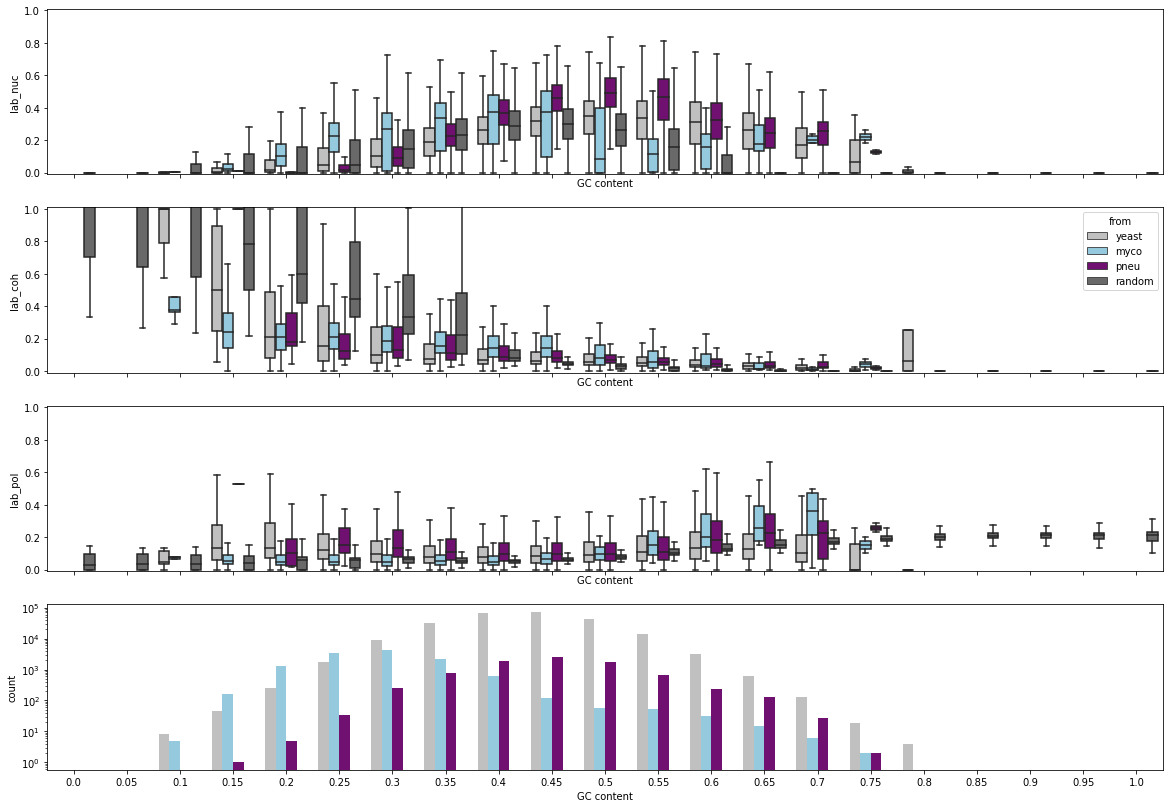

In [38]:
fig, axes = plt.subplots(4, 1, sharex=True, figsize=(20, 14), facecolor='w')
for i, annot in enumerate(['lab_nuc', 'lab_coh', 'lab_pol']):
    if annot[-3:] == 'nuc':
        preds_rand = preds_nuc_rand
    elif annot[-3:] == 'coh':
        preds_rand = preds_coh_rand
    elif annot[-3:] == 'pol':
        preds_rand = preds_pol_rand
    window_rand = pd.DataFrame(preds_rand)
    window_rand['gc_bin'] = np.round(gcs, 2)
    window_rand = pd.melt(window_rand, id_vars='gc_bin').drop('variable', axis=1).rename({'value': annot}, axis=1)
    window_rand['from'] = 'random'
    window_full = pd.concat([window_exp.loc[:, ['gc_bin', annot, 'from']], window_rand])
    sns.boxplot(data=window_full, x='gc_bin', y=annot, hue='from', ax=axes[i],
                palette=['silver', 'skyblue', 'purple', 'dimgray'], fliersize=1, showfliers=False)
    axes[i].set_ylim((-0.01, 1.01))
sns.countplot(data=window_full, x='gc_bin', hue='from', palette=['silver', 'skyblue', 'purple', 'w'], ax=axes[3])
axes[3].set_yscale('log')
for i in range(len(axes)):
    axes[i].set_xlabel('GC content')
    if i != 1:
        axes[i].get_legend().remove()

In [31]:
window_exp['from'] = 'experimental'

In [35]:
window_exp.loc[:, ['from', 'gc', 'gc_bin', 'lab_nuc', 'lab_coh', 'lab_pol']].to_csv(
    Path(data_dir, species, 'results', 'kmers', 'alllabels_binsize100.csv'))

In [40]:
for preds_rand, annot in zip([preds_nuc_rand_reps, preds_coh_rand_reps, preds_pol_rand_reps], ['nuc', 'coh', 'pol']):
    preds_rand = preds_nuc_rand_reps.reshape(21, 6, -1)[:, ::2, :].reshape(21, -1)
    window_rand = pd.DataFrame(preds_rand.reshape(21, 6, -1)[:, ::2, :].reshape(21, -1))
    window_rand['gc_bin'] = np.round(gcs, 2)
    window_rand = pd.melt(window_rand, id_vars='gc_bin').drop('variable', axis=1).rename({'value': annot}, axis=1)
    window_rand['from'] = 'random'
    window_rand.to_csv(Path(data_dir, species, 'results', 'kmers', f'preds_{annot}_random.csv'))

../shared_folder/SCerevisiae/results/kmers/boxplot_binsize100_alllabels_and_counts_exp_vs_random.png exists, changing filename to ../shared_folder/SCerevisiae/results/kmers/boxplot_binsize100_alllabels_and_counts_exp_vs_random(4).png
../shared_folder/SCerevisiae/results/kmers/boxplot_binsize100_alllabels_and_counts_exp_vs_random.svg exists, changing filename to ../shared_folder/SCerevisiae/results/kmers/boxplot_binsize100_alllabels_and_counts_exp_vs_random(4).svg
../shared_folder/SCerevisiae/results/kmers/boxplot_binsize100_alllabels_and_counts_exp_vs_random.pickle exists, changing filename to ../shared_folder/SCerevisiae/results/kmers/boxplot_binsize100_alllabels_and_counts_exp_vs_random(4).pickle


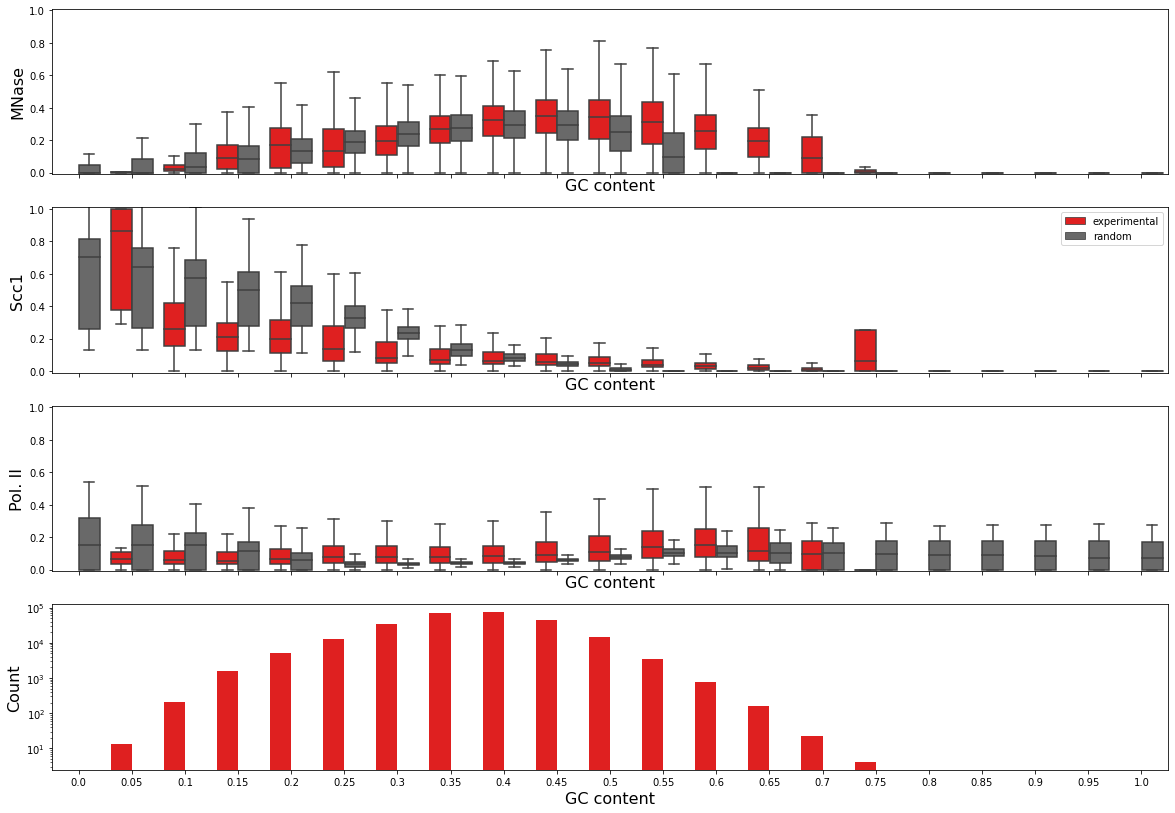

In [32]:
fig, axes = plt.subplots(4, 1, sharex=True, figsize=(20, 14), facecolor='w')
titles = ['MNase', 'Scc1', 'Pol. II', 'Count']
for i, annot in enumerate(['lab_nuc', 'lab_coh', 'lab_pol']):
    if annot[-3:] == 'nuc':
        preds_rand = preds_nuc_rand_reps
    elif annot[-3:] == 'coh':
        preds_rand = preds_coh_rand_reps
    elif annot[-3:] == 'pol':
        preds_rand = preds_pol_rand_reps
    window_rand = pd.DataFrame(preds_rand.reshape(21, 6, -1)[:, ::2, :].reshape(21, -1))
    window_rand['gc_bin'] = np.round(gcs, 2)
    window_rand = pd.melt(window_rand, id_vars='gc_bin').drop('variable', axis=1).rename({'value': annot}, axis=1)
    window_rand['from'] = 'random'
    window_full = pd.concat([window_exp.loc[:, ['gc_bin', annot, 'from']], window_rand])
    sns.boxplot(data=window_full, x='gc_bin', y=annot, hue='from', ax=axes[i],
                palette=['red', 'dimgray'], fliersize=1, showfliers=False)
    axes[i].set_ylim((-0.01, 1.01))
sns.countplot(data=window_full, x='gc_bin', hue='from', palette=['red', 'w'], ax=axes[3])
axes[3].set_yscale('log')
for i in range(len(axes)):
    axes[i].set_ylabel(titles[i], fontsize=16)
    axes[i].set_xlabel('GC content', fontsize=16)
    if i != 1:
        axes[i].get_legend().remove()
    else:
        leg = axes[i].get_legend().set_title('')
plot_utils.save_fig_and_values(fig,
                               Path(data_dir, species, 'results', 'kmers', f'boxplot_binsize{binsize}_alllabels_and_counts_exp_vs_random'),
                               format=['png', 'svg'])

Text(0, 0.5, 'prediction')

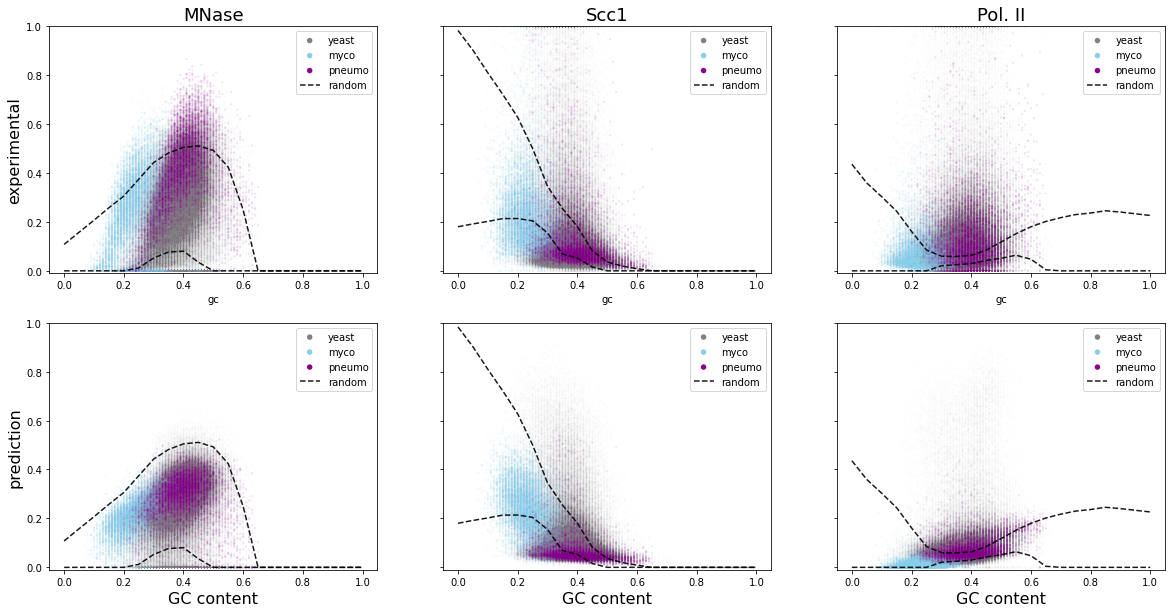

In [85]:
fig, axes = plt.subplots(2, 3, sharey=True, figsize=(20, 10), facecolor='w')
annots = ['lab_nuc', 'lab_coh', 'lab_pol']
titles = ['MNase', 'Scc1', 'Pol. II']
for j, annot in enumerate(annots):
    if annot[-3:] == 'nuc':
        rand_preds = preds_nuc_rand_reps # .reshape(n_gcs, -1)
    elif annot[-3:] == 'coh':
        rand_preds = preds_coh_rand_reps # .reshape(n_gcs, -1)
    elif annot[-3:] == 'pol':
        rand_preds = preds_pol_rand_reps # .reshape(n_gcs, -1)
    else:
        raise ValueError(f"annot can't be {annot}")
    rand_preds = rand_preds.reshape(21, 6, -1)[:, ::2, :].reshape(21, -1)
    qmin, qmax = np.quantile(rand_preds, [0.05, 0.95], axis=1)
    axes[0, j].set_title(titles[j], fontsize=18)
    # sns.scatterplot(ax=axes[j], data=window_full.loc[window_full[f'sep_{annot}'] != 'discarded'], x='gc', y=annot,
    #                 hue=f'sep_{annot}', hue_order=['low', 'mid', 'high'], palette=['b', 'lightgray', 'r'],
    #                 ec=None, s=5)
    sns.scatterplot(ax=axes[0, j], data=window_yeast.loc[window_yeast[f'sep_{annot}'] != 'discarded'], x='gc', y=annot, color='gray', alpha=0.01,
                    # hue=f'sep_{annot}', hue_order=['low', 'mid', 'high'], palette=[to_rgba('darkgray', 0.2), to_rgba('gray', 1), to_rgba('darkgray', 0.2)],
                    ec=None, s=5, label='yeast', legend=False)
    sns.scatterplot(ax=axes[0, j], data=window_myco.loc[window_myco[f'sep_{annot}'] != 'discarded'], x='gc', y=annot, color='skyblue', alpha=0.1,
                    # hue=f'sep_{annot}', hue_order=['low', 'mid', 'high'], palette=[to_rgba('skyblue', 0.05), to_rgba('deepskyblue', 0.25), to_rgba('skyblue', 0.05)],
                    ec=None, s=5, label='myco', legend=False)
    sns.scatterplot(ax=axes[0, j], data=window_pneu.loc[window_pneu[f'sep_{annot}'] != 'discarded'], x='gc', y=annot, color='darkmagenta', alpha=0.1,
                    # hue=f'sep_{annot}', hue_order=['low', 'mid', 'high'], palette=[to_rgba('darkmagenta', 0.05), to_rgba('purple', 0.25), to_rgba('darkmagenta', 0.05)],
                    ec=None, s=5, label='pneumo', legend=False)
    annot = f'pred{annot[-4:]}'
    sns.scatterplot(ax=axes[1, j], data=window_yeast.loc[window_yeast[f'sep_{annot}'] != 'discarded'], x='gc', y=annot, color='gray', alpha=0.01,
                    # hue=f'sep_{annot}', hue_order=['low', 'mid', 'high'], palette=[to_rgba('darkgray', 0.2), to_rgba('gray', 1), to_rgba('darkgray', 0.2)],
                    ec=None, s=5, label='yeast', legend=False)
    sns.scatterplot(ax=axes[1, j], data=window_myco.loc[window_myco[f'sep_{annot}'] != 'discarded'], x='gc', y=annot, color='skyblue', alpha=0.1,
                    # hue=f'sep_{annot}', hue_order=['low', 'mid', 'high'], palette=[to_rgba('skyblue', 0.05), to_rgba('deepskyblue', 0.25), to_rgba('skyblue', 0.05)],
                    ec=None, s=5, label='myco', legend=False)
    sns.scatterplot(ax=axes[1, j], data=window_pneu.loc[window_pneu[f'sep_{annot}'] != 'discarded'], x='gc', y=annot, color='darkmagenta', alpha=0.1,
                    # hue=f'sep_{annot}', hue_order=['low', 'mid', 'high'], palette=[to_rgba('darkmagenta', 0.05), to_rgba('purple', 0.25), to_rgba('darkmagenta', 0.05)],
                    ec=None, s=5, label='pneumo', legend=False)
    for i in range(2):
        axes[i, j].plot(gcs, qmin, color='k', linestyle='--', alpha=0.9, label='random')
        axes[i, j].plot(gcs, qmax, color='k', linestyle='--', alpha=0.9)
        leg = axes[i, j].legend()
        for legh in leg.legendHandles[:-1]:
            legh.set_sizes([30])
            legh.set_alpha(1)
    axes[1, j].set_xlabel('GC content', fontsize=16)

axes[0, 0].set_ylim(bottom=-0.01, top=1)
axes[0, 0].set_ylabel('experimental', fontsize=16)
axes[1, 0].set_ylabel('prediction', fontsize=16)
# plot_utils.save_fig_and_values(fig, Path(data_dir, species, 'results', 'kmers', 'scatter_binsize100_sep_nofull0'), format=['png', 'svg'])

In [86]:
plot_utils.save_fig_and_values(fig, Path(data_dir, species, 'results', 'kmers', 'scatter_binsize100_sep_nofull0'), format='png')

../shared_folder/SCerevisiae/results/kmers/scatter_binsize100_sep_nofull0.png exists, changing filename to ../shared_folder/SCerevisiae/results/kmers/scatter_binsize100_sep_nofull0(5).png
../shared_folder/SCerevisiae/results/kmers/scatter_binsize100_sep_nofull0.pickle exists, changing filename to ../shared_folder/SCerevisiae/results/kmers/scatter_binsize100_sep_nofull0(5).pickle
